# Homework 4

# Varun Thakur

# ID: 6434134721

# Github: vdthakur

# *Using 2 No Penalty Late Days*

# Homework 3 Copied Over

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
warnings.filterwarnings("ignore")

In [2]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# 1(a)  Download the AReM data from: The dataset contains 7 folders that represent seven types of activities. Ineach folder, there are multiple files each of which represents an instant of a human performing an activity. Each file contains 6 time series collected from activities of the same person, which are called avgrss12, varrss12, avgrss13, varrss13,vgrss23, and arrss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

Data downloaded and explored for irregularities on Excel.

# 1(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

## Test Data Split

#### Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data

In [3]:
folders = ["bending1","bending2"]
test_datasets = {}
for folder in folders:
    test_datasets[folder] = []
    for num in range(1,3):
        bending_test_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv",skiprows=4)
        bending_test_df = bending_test_df.drop(columns="# Columns: time")
        test_datasets[folder].append(bending_test_df)
        
folder_2 = ["cycling","lying","sitting","standing","walking"]
for folder in folder_2:
    test_datasets[folder] = []
    for num in range(1,4):
        all_others_test_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv",skiprows=4)
        all_others_test_df = all_others_test_df.drop(columns="# Columns: time")
        all_others_test_df["Activity"] = folder
        test_datasets[folder].append(all_others_test_df)

            
test_dataset_count = []
for value in test_datasets.values():
    test_dataset_count.extend(value)
test_dataframe_count = len(test_dataset_count)

print("The Number of Datasets in the Test Data:", test_dataframe_count)

The Number of Datasets in the Test Data: 19


The test data consists of 19 instances (19 datasets) as specified by the instructions.

## Train Data Split

#### All other datasets as train

In [4]:
train_datasets = {}
for num in range(3,8):
        bending1_train_df = pd.read_csv(f"../data/AReM/bending1/dataset{num}.csv",skiprows=4)
        bending1_train_df = bending1_train_df.drop(columns="# Columns: time")
        bending1_train_df["Activity"] = "bending1"
        if "bending1" not in train_datasets:
            train_datasets["bending1"] = [bending1_train_df]
        else: 
            train_datasets["bending1"].append(bending1_train_df)
for num in range(3,7):
        bending2_train_df = pd.read_csv(f"../data/AReM/bending2/dataset{num}.csv",skiprows=4)
        bending2_train_df = bending2_train_df.drop(columns="# Columns: time")
        bending2_train_df["Activity"] = "bending2"
        if "bending2" not in train_datasets:
            train_datasets["bending2"] = [bending2_train_df]
        else: 
            train_datasets["bending2"].append(bending2_train_df)     
        
folders = ["cycling","lying","sitting","standing","walking"]
for folder in folders:
    for num in range(4,16):
        all_others_train_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv",skiprows=4)
        all_others_train_df = all_others_train_df.drop(columns="# Columns: time")
        all_others_train_df["Activity"] = folder
        if folder not in train_datasets:
            train_datasets[folder] = [all_others_train_df]
        else: train_datasets[folder].append(all_others_train_df)
            
dataset_count = []
for value in train_datasets.values():
    dataset_count.extend(value)
dataframe_count = len(dataset_count)

print("The Number of Datasets in the Train Data:", dataframe_count)


The Number of Datasets in the Train Data: 69


The train data consists of 69 instances (69 datasets) as specified by the instructions.

# 1(c)(i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

# 1(c)(ii) Extract the time-domain features minimum, maximum, mean, median, stan-dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [5]:
def folderFeatureDataFrame(folder):
    columns = ["min1", "max1", "mean1", "median1", "std1", "firstquartile1", "thirdquartile1",
               "min2", "max2", "mean2", "median2", "std2", "firstquartile2", "thirdquartile2",
               "min3", "max3", "mean3", "median3", "std3", "firstquartile3", "thirdquartile3",
               "min4", "max4", "mean4", "median4", "std4", "firstquartile4", "thirdquartile4",
               "min5", "max5", "mean5", "median5", "std5", "firstquartile5", "thirdquartile5",
               "min6", "max6", "mean6", "median6", "std6", "firstquartile6", "thirdquartile6"]
    folder_df = pd.DataFrame(columns=columns)
    files = glob.glob(f"../data/AReM/{folder}/*.csv")
    for filepath in files:
        df = pd.read_csv(filepath, skiprows=4)
        df = df.drop(columns="# Columns: time")
        td_features_data = []
        for column in df.columns:
            minimum = df[column].min()
            maximum = df[column].max()
            mean = df[column].mean()
            median = df[column].median()
            stdev = df[column].std()
            firstquartile = df[column].quantile(0.25)
            thirdquartile = df[column].quantile(0.75)
            td_features_data.extend([minimum, maximum, mean, median, stdev, firstquartile, thirdquartile])

        folder_df = pd.concat([folder_df, pd.DataFrame([td_features_data], columns=columns)], ignore_index=True)
    
    return folder_df

In [6]:
bending_one = folderFeatureDataFrame("bending1")
bending_two = folderFeatureDataFrame("bending2")
cycling = folderFeatureDataFrame("cycling")
lying = folderFeatureDataFrame("lying")
sitting = folderFeatureDataFrame("sitting")
standing = folderFeatureDataFrame("standing")
walking = folderFeatureDataFrame("walking")

# 1(c)(ii) New Dataset with Time Series Features for All 88 Instances

In [7]:
all_folders_df = pd.concat([bending_one,bending_two,cycling,lying,sitting,standing,walking], ignore_index=True)
all_folders_df.index = all_folders_df.index + 1

# 1(c)(iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. 

In [8]:
columns = ["min1", "max1", "mean1", "median1", "std1", "firstquartile1", "thirdquartile1", 
           "min2", "max2", "mean2", "median2", "std2", "firstquartile2", "thirdquartile2",
            "min3", "max3", "mean3", "median3", "std3", "firstquartile3", "thirdquartile3",
            "min4", "max4", "mean4", "median4", "std4", "firstquartile4", "thirdquartile4",
            "min5", "max5", "mean5", "median5", "std5", "firstquartile5", "thirdquartile5",
            "min6", "max6", "mean6", "median6", "std6", "firstquartile6", "thirdquartile6"]
stdev_list = []
for column in all_folders_df.columns:
    stdev = all_folders_df[column].std()
    stdev_list.append(stdev)
stdev_df = pd.DataFrame([stdev_list],columns=columns)

# 1(c)(iii)Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [9]:
interval_number = 0
for td_feature in all_folders_df.columns:
    interval_number += 1
    feature_data = ((all_folders_df[td_feature]),)
    bootstrap_data = bootstrap(feature_data, np.std, confidence_level=0.9, random_state=24)
    confidence_interval = bootstrap_data.confidence_interval

# 1(c)(iv) Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

From my judgment, the three best time-domain features are median, standard deviation, and the maximum. The median will be more rigid to any outliers and shows the center of the data. The standard deviation will help us understand the spread of the data. And the maximum in a time series can help us identify the peak which can be important for understanding time series data.

# References for HW 3

For bootstrapping:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

glob: https://docs.python.org/3/library/glob.html

# Start of Homework 4 
# Part 2: Binary and Multiclass Classification

# 2(a)(i) Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4

In [10]:
def datasetFeaturesDataFrame(folder,num):
    columns = ["min1", "max1", "mean1", "median1", "std1", "firstquartile1", "thirdquartile1",
               "min2", "max2", "mean2", "median2", "std2", "firstquartile2", "thirdquartile2",
               "min3", "max3", "mean3", "median3", "std3", "firstquartile3", "thirdquartile3",
               "min4", "max4", "mean4", "median4", "std4", "firstquartile4", "thirdquartile4",
               "min5", "max5", "mean5", "median5", "std5", "firstquartile5", "thirdquartile5",
               "min6", "max6", "mean6", "median6", "std6", "firstquartile6", "thirdquartile6"]
    files = glob.glob(f"../data/AReM/{folder}/dataset{num}.csv")
    dataset_df = pd.DataFrame(columns=columns)
    for filepath in files:
        df = pd.read_csv(filepath, skiprows=4)
        df = df.drop(columns="# Columns: time")
        td_features_data = []
        for column in df.columns:
            minimum = df[column].min()
            maximum = df[column].max()
            mean = df[column].mean()
            median = df[column].median()
            stdev = df[column].std()
            firstquartile = df[column].quantile(0.25)
            thirdquartile = df[column].quantile(0.75)
            td_features_data.extend([minimum, maximum, mean, median, stdev, firstquartile, thirdquartile])
        
        dataset_df = pd.concat([dataset_df, pd.DataFrame([td_features_data], columns=columns)], ignore_index=True)
    
    return dataset_df

In [11]:
bending_one_train = range(3,8)
folder = "bending1"
columns = ["min1", "max1", "mean1", "median1", "std1", "firstquartile1", "thirdquartile1",
               "min2", "max2", "mean2", "median2", "std2", "firstquartile2", "thirdquartile2",
               "min3", "max3", "mean3", "median3", "std3", "firstquartile3", "thirdquartile3",
               "min4", "max4", "mean4", "median4", "std4", "firstquartile4", "thirdquartile4",
               "min5", "max5", "mean5", "median5", "std5", "firstquartile5", "thirdquartile5",
               "min6", "max6", "mean6", "median6", "std6", "firstquartile6", "thirdquartile6"]
bending1_train = pd.DataFrame(columns=columns)
for num in bending_one_train:
    df = datasetFeaturesDataFrame(folder,num)
    bending1_train = pd.concat([bending1_train, df],ignore_index=True)
bending1_train

min1   max1      mean1  median1      std1  firstquartile1  thirdquartile1  \
0  35.00  47.40  43.954500    44.33  1.558835           43.00           45.00   
1  33.00  47.75  42.179812    43.50  3.670666           39.15           45.00   
2  33.00  45.75  41.678063    41.75  2.243490           41.33           42.75   
3  37.00  48.00  43.454958    43.25  1.386098           42.50           45.00   
4  36.25  48.00  43.969125    44.50  1.618364           43.31           44.67   

   min2  max2     mean2  ...      std5  firstquartile5  thirdquartile5  min6  \
0   0.0  1.70  0.426250  ...  1.999604         35.3625           36.50   0.0   
1   0.0  3.00  0.696042  ...  3.849448         30.4575           36.33   0.0   
2   0.0  2.83  0.535979  ...  2.411026         28.4575           31.25   0.0   
3   0.0  1.58  0.378083  ...  2.488862         22.2500           24.00   0.0   
4   0.0  1.50  0.413125  ...  3.318301         20.5000           23.75   0.0   

   max6     mean6  median6      std6  firstquartile6  thirdquartile6  
0  1.79  0.493292     0.43  0.513506            0.00            0.94  
1  2.18  0.613521     0.50  0.524317            0.00            1.00  
2  1.79  0.383292     0.43  0.389164            0.00            0.50  
3  5.26  0.679646     0.50  0.622534            0.43            0.87  
4  2.96  0.555312     0.49  0.487826            0.00            0.83  

[5 rows x 42 columns]

In [12]:
bending_two_train = range(3,7)
folder = "bending2"
bending2_train = pd.DataFrame(columns=columns)
for num in bending_two_train:
    df = datasetFeaturesDataFrame(folder,num)
    bending2_train = pd.concat([bending2_train, df],ignore_index=True)
bending2_train

min1  max1      mean1  median1      std1  firstquartile1  thirdquartile1  \
0  21.0  50.0  32.586208    33.00  6.238143         26.1875         34.5000   
1  27.5  33.0  29.881938    30.00  1.153837         29.0000         30.2700   
2  19.0  45.5  30.938104    29.00  7.684146         26.7500         38.0000   
3  25.0  47.5  31.058250    29.71  4.829794         27.5000         31.8125   

   min2  max2     mean2  ...      std5  firstquartile5  thirdquartile5  min6  \
0   0.0  9.90  0.516125  ...  5.032424           17.67         23.5000   0.0   
1   0.0  1.00  0.256437  ...  1.745970           17.00         19.0000   0.0   
2   0.0  6.40  0.467167  ...  5.845911           15.00         20.8125   0.0   
3   0.0  6.38  0.405458  ...  7.853427            9.00         18.3125   0.0   

    max6     mean6  median6      std6  firstquartile6  thirdquartile6  
0  13.61  1.162042     0.83  1.332980            0.47            1.30  
1   6.40  0.701625     0.71  0.481103            0.47            0.94  
2   6.73  1.107354     0.83  1.080842            0.47            1.30  
3   4.92  1.098104     0.94  0.831480            0.50            1.30  

[4 rows x 42 columns]

In [13]:
all_other_folders_range_train = range(4,16)
folders = ["cycling","lying","sitting","standing","walking"]
all_other_folders_train = pd.DataFrame(columns=columns)
for folder in folders:
    for num in all_other_folders_range_train:
        df = datasetFeaturesDataFrame(folder,num)
        all_other_folders_train = pd.concat([all_other_folders_train, df],ignore_index=True)

From above, we can see that the datasets are ordered and that the first 9 instances represent the training datasets in the Bending folders as seen below

In [14]:
train_df = pd.DataFrame(columns=columns)
train_df = pd.concat([bending1_train,bending2_train,all_other_folders_train],ignore_index=True)
train_df.index = train_df.index + 1
display(train_df.head(9))

min1   max1      mean1  median1      std1  firstquartile1  thirdquartile1  \
1  35.00  47.40  43.954500    44.33  1.558835         43.0000         45.0000   
2  33.00  47.75  42.179812    43.50  3.670666         39.1500         45.0000   
3  33.00  45.75  41.678063    41.75  2.243490         41.3300         42.7500   
4  37.00  48.00  43.454958    43.25  1.386098         42.5000         45.0000   
5  36.25  48.00  43.969125    44.50  1.618364         43.3100         44.6700   
6  21.00  50.00  32.586208    33.00  6.238143         26.1875         34.5000   
7  27.50  33.00  29.881938    30.00  1.153837         29.0000         30.2700   
8  19.00  45.50  30.938104    29.00  7.684146         26.7500         38.0000   
9  25.00  47.50  31.058250    29.71  4.829794         27.5000         31.8125   

   min2  max2     mean2  ...      std5  firstquartile5  thirdquartile5  min6  \
1   0.0  1.70  0.426250  ...  1.999604         35.3625         36.5000   0.0   
2   0.0  3.00  0.696042  ...  3.849448         30.4575         36.3300   0.0   
3   0.0  2.83  0.535979  ...  2.411026         28.4575         31.2500   0.0   
4   0.0  1.58  0.378083  ...  2.488862         22.2500         24.0000   0.0   
5   0.0  1.50  0.413125  ...  3.318301         20.5000         23.7500   0.0   
6   0.0  9.90  0.516125  ...  5.032424         17.6700         23.5000   0.0   
7   0.0  1.00  0.256437  ...  1.745970         17.0000         19.0000   0.0   
8   0.0  6.40  0.467167  ...  5.845911         15.0000         20.8125   0.0   
9   0.0  6.38  0.405458  ...  7.853427          9.0000         18.3125   0.0   

    max6     mean6  median6      std6  firstquartile6  thirdquartile6  
1   1.79  0.493292     0.43  0.513506            0.00            0.94  
2   2.18  0.613521     0.50  0.524317            0.00            1.00  
3   1.79  0.383292     0.43  0.389164            0.00            0.50  
4   5.26  0.679646     0.50  0.622534            0.43            0.87  
5   2.96  0.555312     0.49  0.487826            0.00            0.83  
6  13.61  1.162042     0.83  1.332980            0.47            1.30  
7   6.40  0.701625     0.71  0.481103            0.47            0.94  
8   6.73  1.107354     0.83  1.080842            0.47            1.30  
9   4.92  1.098104     0.94  0.831480            0.50            1.30  

[9 rows x 42 columns]

In [15]:
bending_train_df = train_df.iloc[:9]
bending_train_df

min1   max1      mean1  median1      std1  firstquartile1  thirdquartile1  \
1  35.00  47.40  43.954500    44.33  1.558835         43.0000         45.0000   
2  33.00  47.75  42.179812    43.50  3.670666         39.1500         45.0000   
3  33.00  45.75  41.678063    41.75  2.243490         41.3300         42.7500   
4  37.00  48.00  43.454958    43.25  1.386098         42.5000         45.0000   
5  36.25  48.00  43.969125    44.50  1.618364         43.3100         44.6700   
6  21.00  50.00  32.586208    33.00  6.238143         26.1875         34.5000   
7  27.50  33.00  29.881938    30.00  1.153837         29.0000         30.2700   
8  19.00  45.50  30.938104    29.00  7.684146         26.7500         38.0000   
9  25.00  47.50  31.058250    29.71  4.829794         27.5000         31.8125   

   min2  max2     mean2  ...      std5  firstquartile5  thirdquartile5  min6  \
1   0.0  1.70  0.426250  ...  1.999604         35.3625         36.5000   0.0   
2   0.0  3.00  0.696042  ...  3.849448         30.4575         36.3300   0.0   
3   0.0  2.83  0.535979  ...  2.411026         28.4575         31.2500   0.0   
4   0.0  1.58  0.378083  ...  2.488862         22.2500         24.0000   0.0   
5   0.0  1.50  0.413125  ...  3.318301         20.5000         23.7500   0.0   
6   0.0  9.90  0.516125  ...  5.032424         17.6700         23.5000   0.0   
7   0.0  1.00  0.256437  ...  1.745970         17.0000         19.0000   0.0   
8   0.0  6.40  0.467167  ...  5.845911         15.0000         20.8125   0.0   
9   0.0  6.38  0.405458  ...  7.853427          9.0000         18.3125   0.0   

    max6     mean6  median6      std6  firstquartile6  thirdquartile6  
1   1.79  0.493292     0.43  0.513506            0.00            0.94  
2   2.18  0.613521     0.50  0.524317            0.00            1.00  
3   1.79  0.383292     0.43  0.389164            0.00            0.50  
4   5.26  0.679646     0.50  0.622534            0.43            0.87  
5   2.96  0.555312     0.49  0.487826            0.00            0.83  
6  13.61  1.162042     0.83  1.332980            0.47            1.30  
7   6.40  0.701625     0.71  0.481103            0.47            0.94  
8   6.73  1.107354     0.83  1.080842            0.47            1.30  
9   4.92  1.098104     0.94  0.831480            0.50            1.30  

[9 rows x 42 columns]

In [16]:
all_others_train_df = train_df.iloc[9:]
all_others_train_df.shape

(60, 42)

In [17]:
columns = ["median1","std1","max1","median2","std2","max2","median6","std6","max6"]
selected_bending_columns_df = bending_train_df[columns]
selected_bending_columns_df["Activity"] = "Bending"

In [18]:
columns = ["median1","std1","max1","median2","std2","max2","median6","std6","max6"]
selected_other_columns_df = all_others_train_df[columns]
selected_other_columns_df["Activity"] = "Others"

In [19]:
combined_df = pd.concat([selected_bending_columns_df, selected_other_columns_df])
combined_df

median1      std1   max1  median2      std2   max2  median6      std6  \
1     44.33  1.558835  47.40    0.470  0.338690   1.70     0.43  0.513506   
2     43.50  3.670666  47.75    0.500  0.630860   3.00     0.50  0.524317   
3     41.75  2.243490  45.75    0.500  0.405469   2.83     0.43  0.389164   
4     43.25  1.386098  48.00    0.470  0.315566   1.58     0.50  0.622534   
5     44.50  1.618364  48.00    0.470  0.263111   1.50     0.49  0.487826   
..      ...       ...    ...      ...       ...    ...      ...       ...   
65    34.25  4.650935  45.33    4.260  2.461077  14.67     3.11  1.640243   
66    35.25  4.752477  45.50    3.900  2.599284  13.47     3.20  1.732727   
67    35.25  4.842294  46.00    4.135  2.360448  12.47     3.08  1.656742   
68    35.25  4.531720  46.25    3.925  2.435437  14.82     3.27  1.690960   
69    35.00  4.796705  44.00    3.960  2.388746  13.86     3.09  1.699114   

     max6 Activity  
1    1.79  Bending  
2    2.18  Bending  
3    1.79  Bending  
4    5.26  Bending  
5    2.96  Bending  
..    ...      ...  
65   8.32   Others  
66   9.67   Others  
67  10.00   Others  
68   9.51   Others  
69   9.00   Others  

[69 rows x 10 columns]

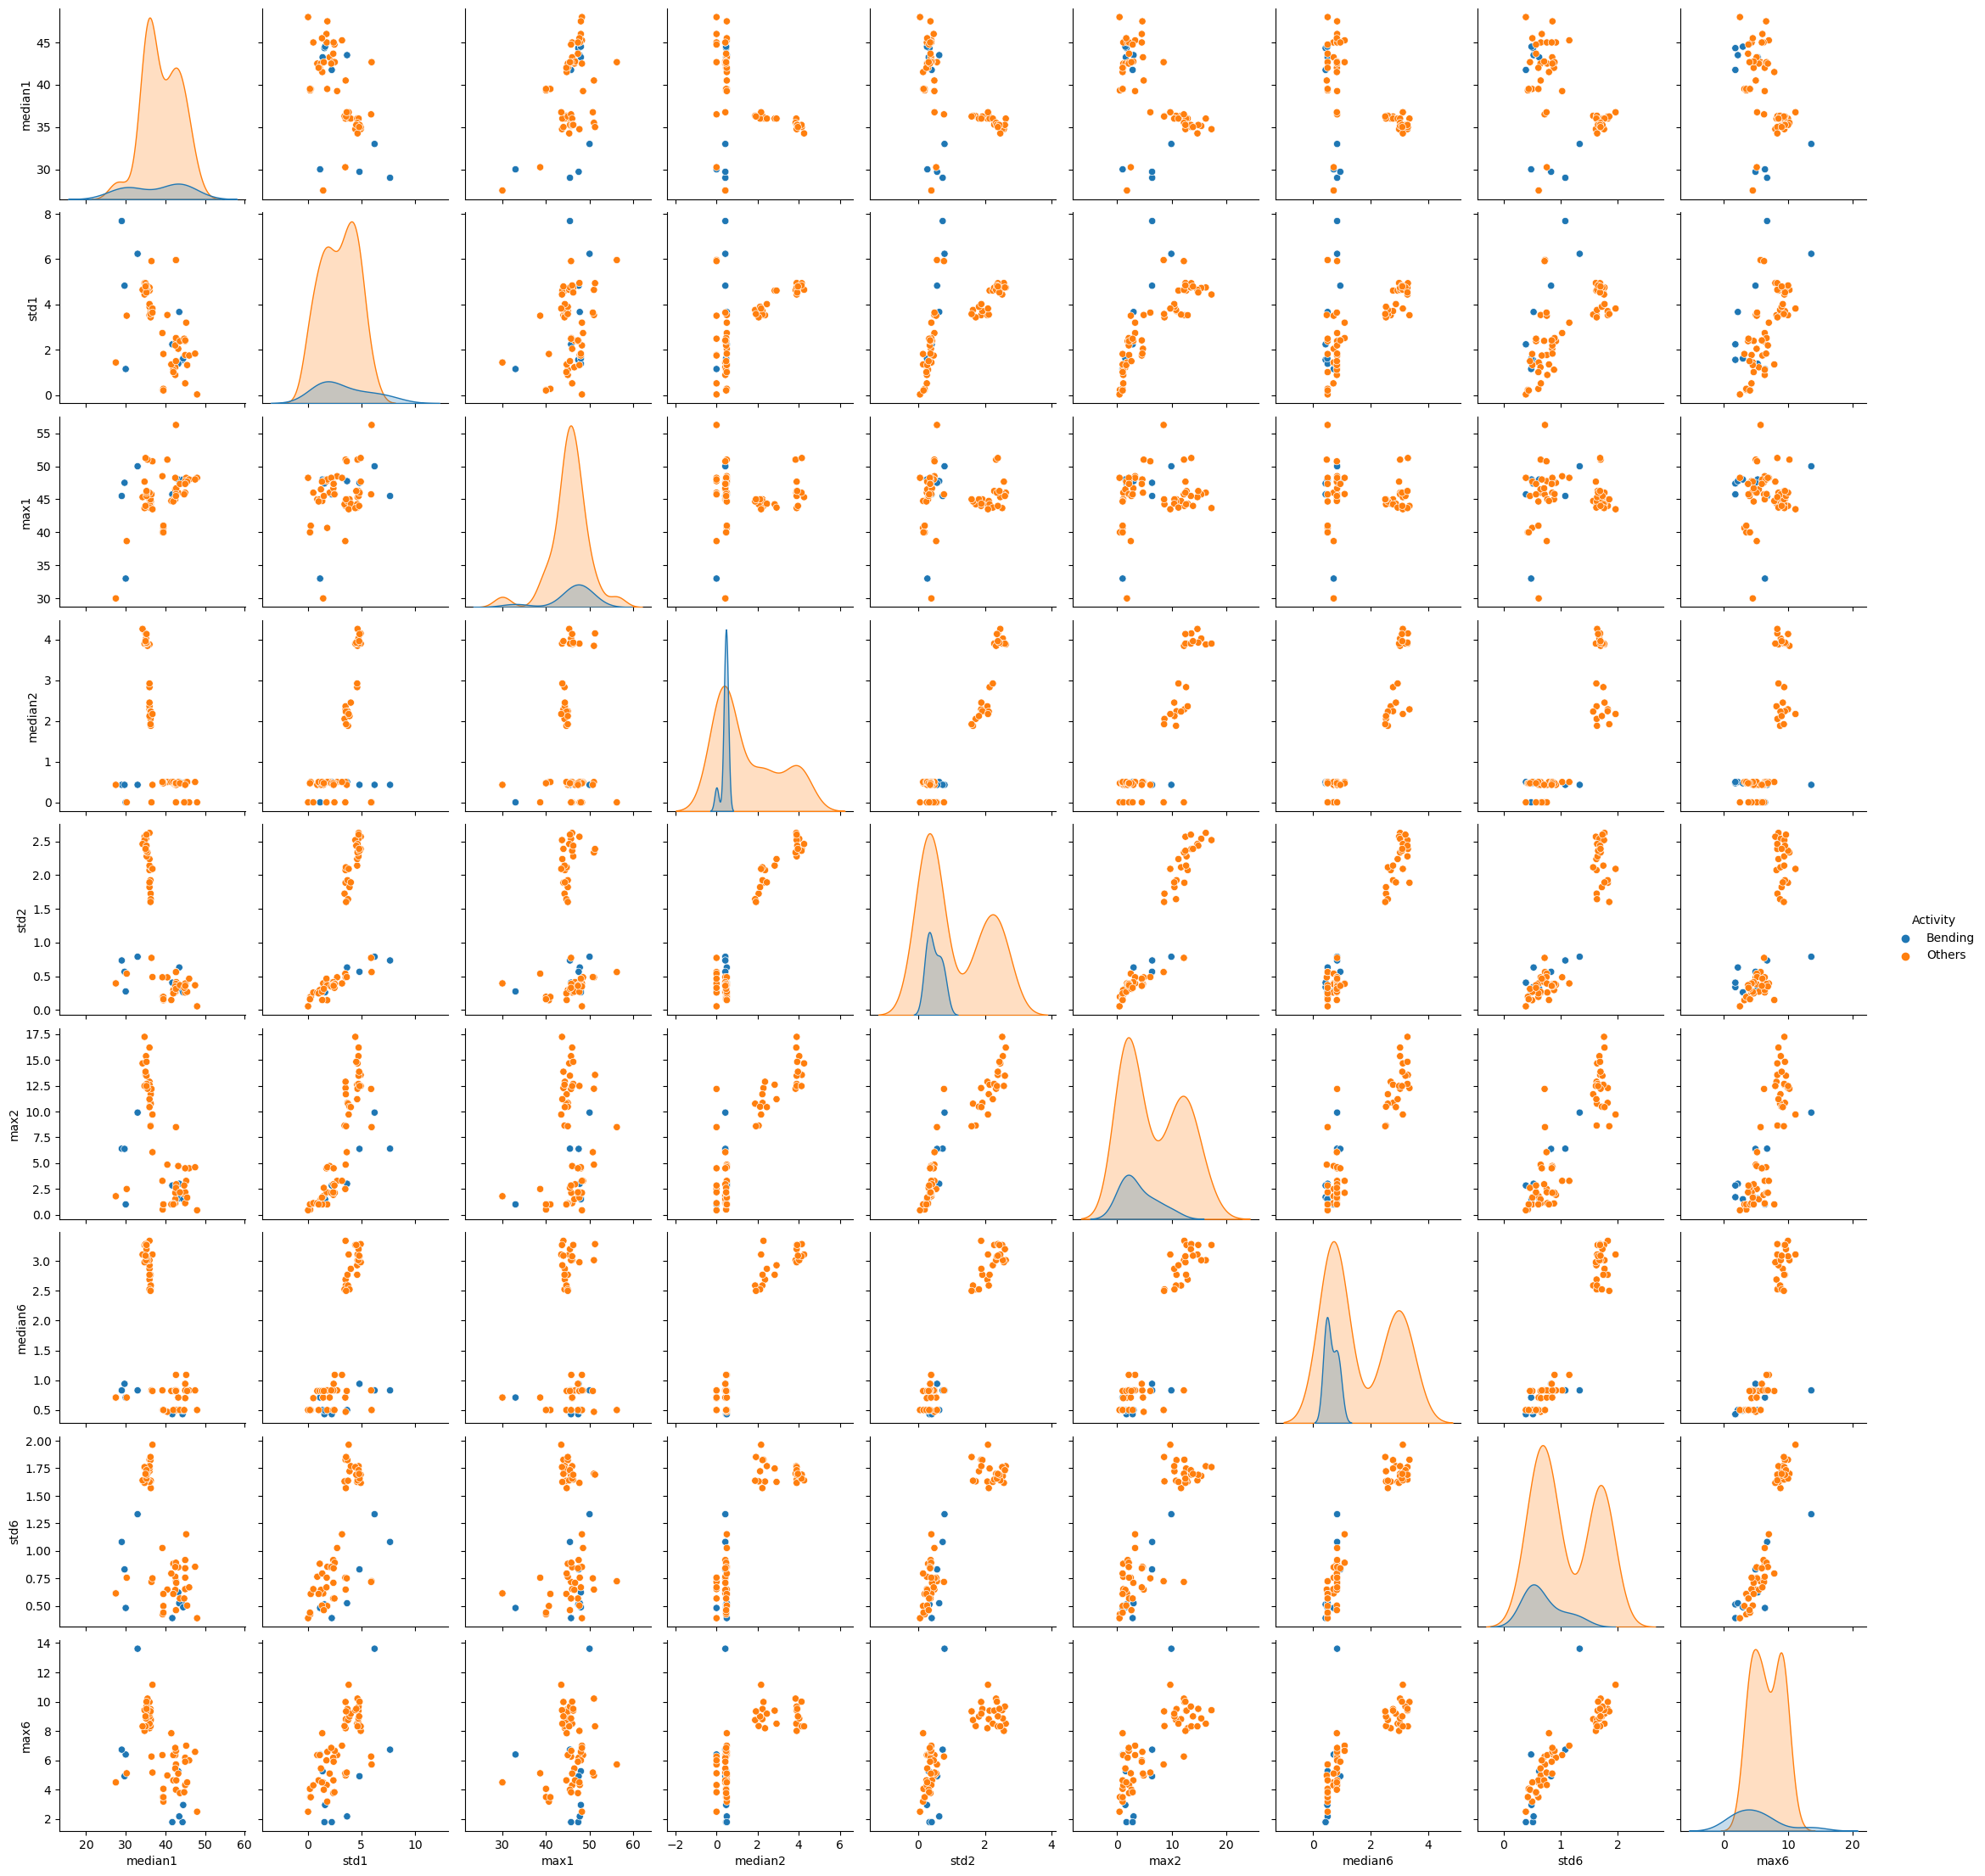

In [20]:
sns.pairplot(combined_df, hue="Activity")

# 2(a)(ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

In [21]:
def splitHalfDatasets(folder, num):
    columns = ["avg_rss12_median1","avg_rss12_stdev1","avg_rss12_max1","avg_rss12_median2","avg_rss12_stdev2","avg_rss12_max2",
              "var_rss12_median1","var_rss12_stdev1","var_rss12_max1","var_rss12_median2","var_rss12_stdev2","var_rss12_max2",
              "var_rss23_median1","var_rss23_stdev1","var_rss23_max1","var_rss23_median2","var_rss23_stdev2","var_rss23_max2"]
    
    files = glob.glob(f"../data/AReM/{folder}/dataset{num}.csv")
    
    dataset_df = pd.DataFrame(columns=columns)
    
    for filepath in files:
        df = pd.read_csv(filepath, skiprows=4)
        df = df.drop(columns="# Columns: time")
        
        split_point = len(df) // 2
        df_first_half = df.iloc[:split_point, :]
        df_second_half = df.iloc[split_point:, :]
        
        td_features_data = []
        for column in ["avg_rss12","var_rss12","var_rss23"]:
            median = df_first_half[column].median()
            stdev = df_first_half[column].std()
            maximum = df_first_half[column].max()
            median2 = df_second_half[column].median()
            stdev2 = df_second_half[column].std()
            maximum2 = df_second_half[column].max()
            td_features_data.extend([median, median2, stdev,stdev2, maximum,maximum2])
        
        dataset_df = pd.concat([dataset_df, pd.DataFrame([td_features_data], columns=columns)], ignore_index=True)
        
    return dataset_df

In [22]:
bending_one_range = range(3,8)
bending1_half_df = pd.DataFrame()
for num in bending_one_range:
    df1 = splitHalfDatasets("bending1", num)
    bending1_half_df = pd.concat([bending1_half_df,df1],ignore_index=True)
bending1_half_df["Activity"] = "Bending"
bending1_half_df

avg_rss12_median1  avg_rss12_stdev1  avg_rss12_max1  avg_rss12_median2  \
0              44.50             43.50        1.556971           1.557168   
1              45.00             42.00        3.473355           3.537481   
2              42.33             41.50        3.118644           0.595920   
3              45.00             42.67        1.359836           1.058792   
4              43.71             44.50        1.281976           1.771251   

   avg_rss12_stdev2  avg_rss12_max2  var_rss12_median1  var_rss12_stdev1  \
0             46.50           47.40              0.470               0.5   
1             47.75           46.00              0.485               0.5   
2             45.75           43.67              0.500               0.5   
3             48.00           46.50              0.000               0.5   
4             45.00           48.00              0.470               0.5   

   var_rss12_max1  var_rss12_median2  var_rss12_stdev2  var_rss12_max2  \
0        0.329540           0.342346              1.50            1.70   
1        0.634285           0.627915              3.00            2.86   
2        0.489595           0.273050              2.83            1.12   
3        0.314099           0.260761              1.30            1.58   
4        0.284434           0.235493              1.30            1.50   

   var_rss23_median1  var_rss23_stdev1  var_rss23_max1  var_rss23_median2  \
0              0.500              0.00        0.526656           0.478528   
1              0.765              0.47        0.554542           0.491873   
2              0.430              0.43        0.411200           0.363144   
3              0.710              0.50        0.718016           0.473445   
4              0.470              0.50        0.486847           0.487918   

   var_rss23_stdev2  var_rss23_max2 Activity  
0              1.79            1.50  Bending  
1              1.53            2.18  Bending  
2              1.79            1.50  Bending  
3              5.26            4.06  Bending  
4              2.28            2.96  Bending

In [23]:
bending_two_range = range(3,7)
bending2_half_df = pd.DataFrame()
for num in bending_two_range:
    df2 = splitHalfDatasets("bending2", num)
    bending2_half_df = pd.concat([bending2_half_df,df2],ignore_index=True)
bending2_half_df["Activity"] = "Bending"
bending2_half_df

avg_rss12_median1  avg_rss12_stdev1  avg_rss12_max1  avg_rss12_median2  \
0             26.125            33.000        8.743464           0.941701   
1             30.290            29.000        0.937965           0.635067   
2             27.000            30.000        6.216895           8.576204   
3             30.500            27.585        5.097232           1.434469   

   avg_rss12_stdev2  avg_rss12_max2  var_rss12_median1  var_rss12_stdev1  \
0             50.00            36.0               0.47              0.00   
1             33.00            30.0               0.43              0.00   
2             39.25            45.5               0.43              0.43   
3             47.50            33.0               0.47              0.43   

   var_rss12_max1  var_rss12_median2  var_rss12_stdev2  var_rss12_max2  \
0        0.936124           0.603331              9.90            1.87   
1        0.299197           0.243590              1.00            0.87   
2        0.731004           0.738184              4.33            6.40   
3        0.712906           0.323927              6.38            2.18   

   var_rss23_median1  var_rss23_stdev1  var_rss23_max1  var_rss23_median2  \
0              1.045              0.71        1.639122           0.768408   
1              0.710              0.71        0.599116           0.322210   
2              0.820              0.87        1.161161           0.996452   
3              0.830              1.00        0.813779           0.838177   

   var_rss23_stdev2  var_rss23_max2 Activity  
0             13.61            6.02  Bending  
1              6.40            1.50  Bending  
2              6.73            5.61  Bending  
3              4.71            4.92  Bending

In [24]:
others_range = range(4,16)
folders = ["cycling","lying","sitting","standing","walking"]

others_half_df = pd.DataFrame()
for folder in folders:
    for num in others_range:
        df3 = splitHalfDatasets(folder,num)
        others_half_df = pd.concat([others_half_df,df3],ignore_index=True)
others_half_df["Activity"] = "Other"
others_half_df.shape

(60, 19)

In [25]:
combined_half_split_train_df = pd.concat([bending1_half_df,bending2_half_df,others_half_df],ignore_index=True)
combined_half_split_train_df.index = combined_half_split_train_df.index + 1
combined_half_split_train_df

avg_rss12_median1  avg_rss12_stdev1  avg_rss12_max1  avg_rss12_median2  \
1              44.500            43.500        1.556971           1.557168   
2              45.000            42.000        3.473355           3.537481   
3              42.330            41.500        3.118644           0.595920   
4              45.000            42.670        1.359836           1.058792   
5              43.710            44.500        1.281976           1.771251   
..                ...               ...             ...                ...   
65             34.000            34.500        4.874433           4.411903   
66             34.415            35.500        4.872880           4.621400   
67             35.000            35.875        4.758757           4.880650   
68             35.330            35.250        4.272282           4.785599   
69             35.375            34.500        4.634209           4.923609   

    avg_rss12_stdev2  avg_rss12_max2  var_rss12_median1  var_rss12_stdev1  \
1              46.50           47.40              0.470             0.500   
2              47.75           46.00              0.485             0.500   
3              45.75           43.67              0.500             0.500   
4              48.00           46.50              0.000             0.500   
5              45.00           48.00              0.470             0.500   
..               ...             ...                ...               ...   
65             45.00           45.33              4.195             4.320   
66             44.50           45.50              4.030             3.740   
67             43.33           46.00              4.470             3.880   
68             44.00           46.25              3.865             4.070   
69             44.00           43.33              3.850             4.195   

    var_rss12_max1  var_rss12_median2  var_rss12_stdev2  var_rss12_max2  \
1         0.329540           0.342346              1.50            1.70   
2         0.634285           0.627915              3.00            2.86   
3         0.489595           0.273050              2.83            1.12   
4         0.314099           0.260761              1.30            1.58   
5         0.284434           0.235493              1.30            1.50   
..             ...                ...               ...             ...   
65        2.196206           2.694219             11.78           14.67   
66        2.762730           2.387460             13.47           12.50   
67        2.391804           2.315929             12.47           12.28   
68        2.341763           2.514203             14.82           12.26   
69        2.396878           2.381634             13.86           12.97   

    var_rss23_median1  var_rss23_stdev1  var_rss23_max1  var_rss23_median2  \
1               0.500             0.000        0.526656           0.478528   
2               0.765             0.470        0.554542           0.491873   
3               0.430             0.430        0.411200           0.363144   
4               0.710             0.500        0.718016           0.473445   
5               0.470             0.500        0.486847           0.487918   
..                ...               ...             ...                ...   
65              3.110             3.155        1.637310           1.646023   
66              3.255             3.155        1.703098           1.758379   
67              2.980             3.255        1.619767           1.691050   
68              3.270             3.350        1.781928           1.598536   
69              3.200             3.060        1.737420           1.657578   

    var_rss23_stdev2  var_rss23_max2 Activity  
1               1.79            1.50  Bending  
2               1.53            2.18  Bending  
3               1.79            1.50  Bending  
4               5.26            4.06  Bending  
5               2.28            2.96  Bending  
..              

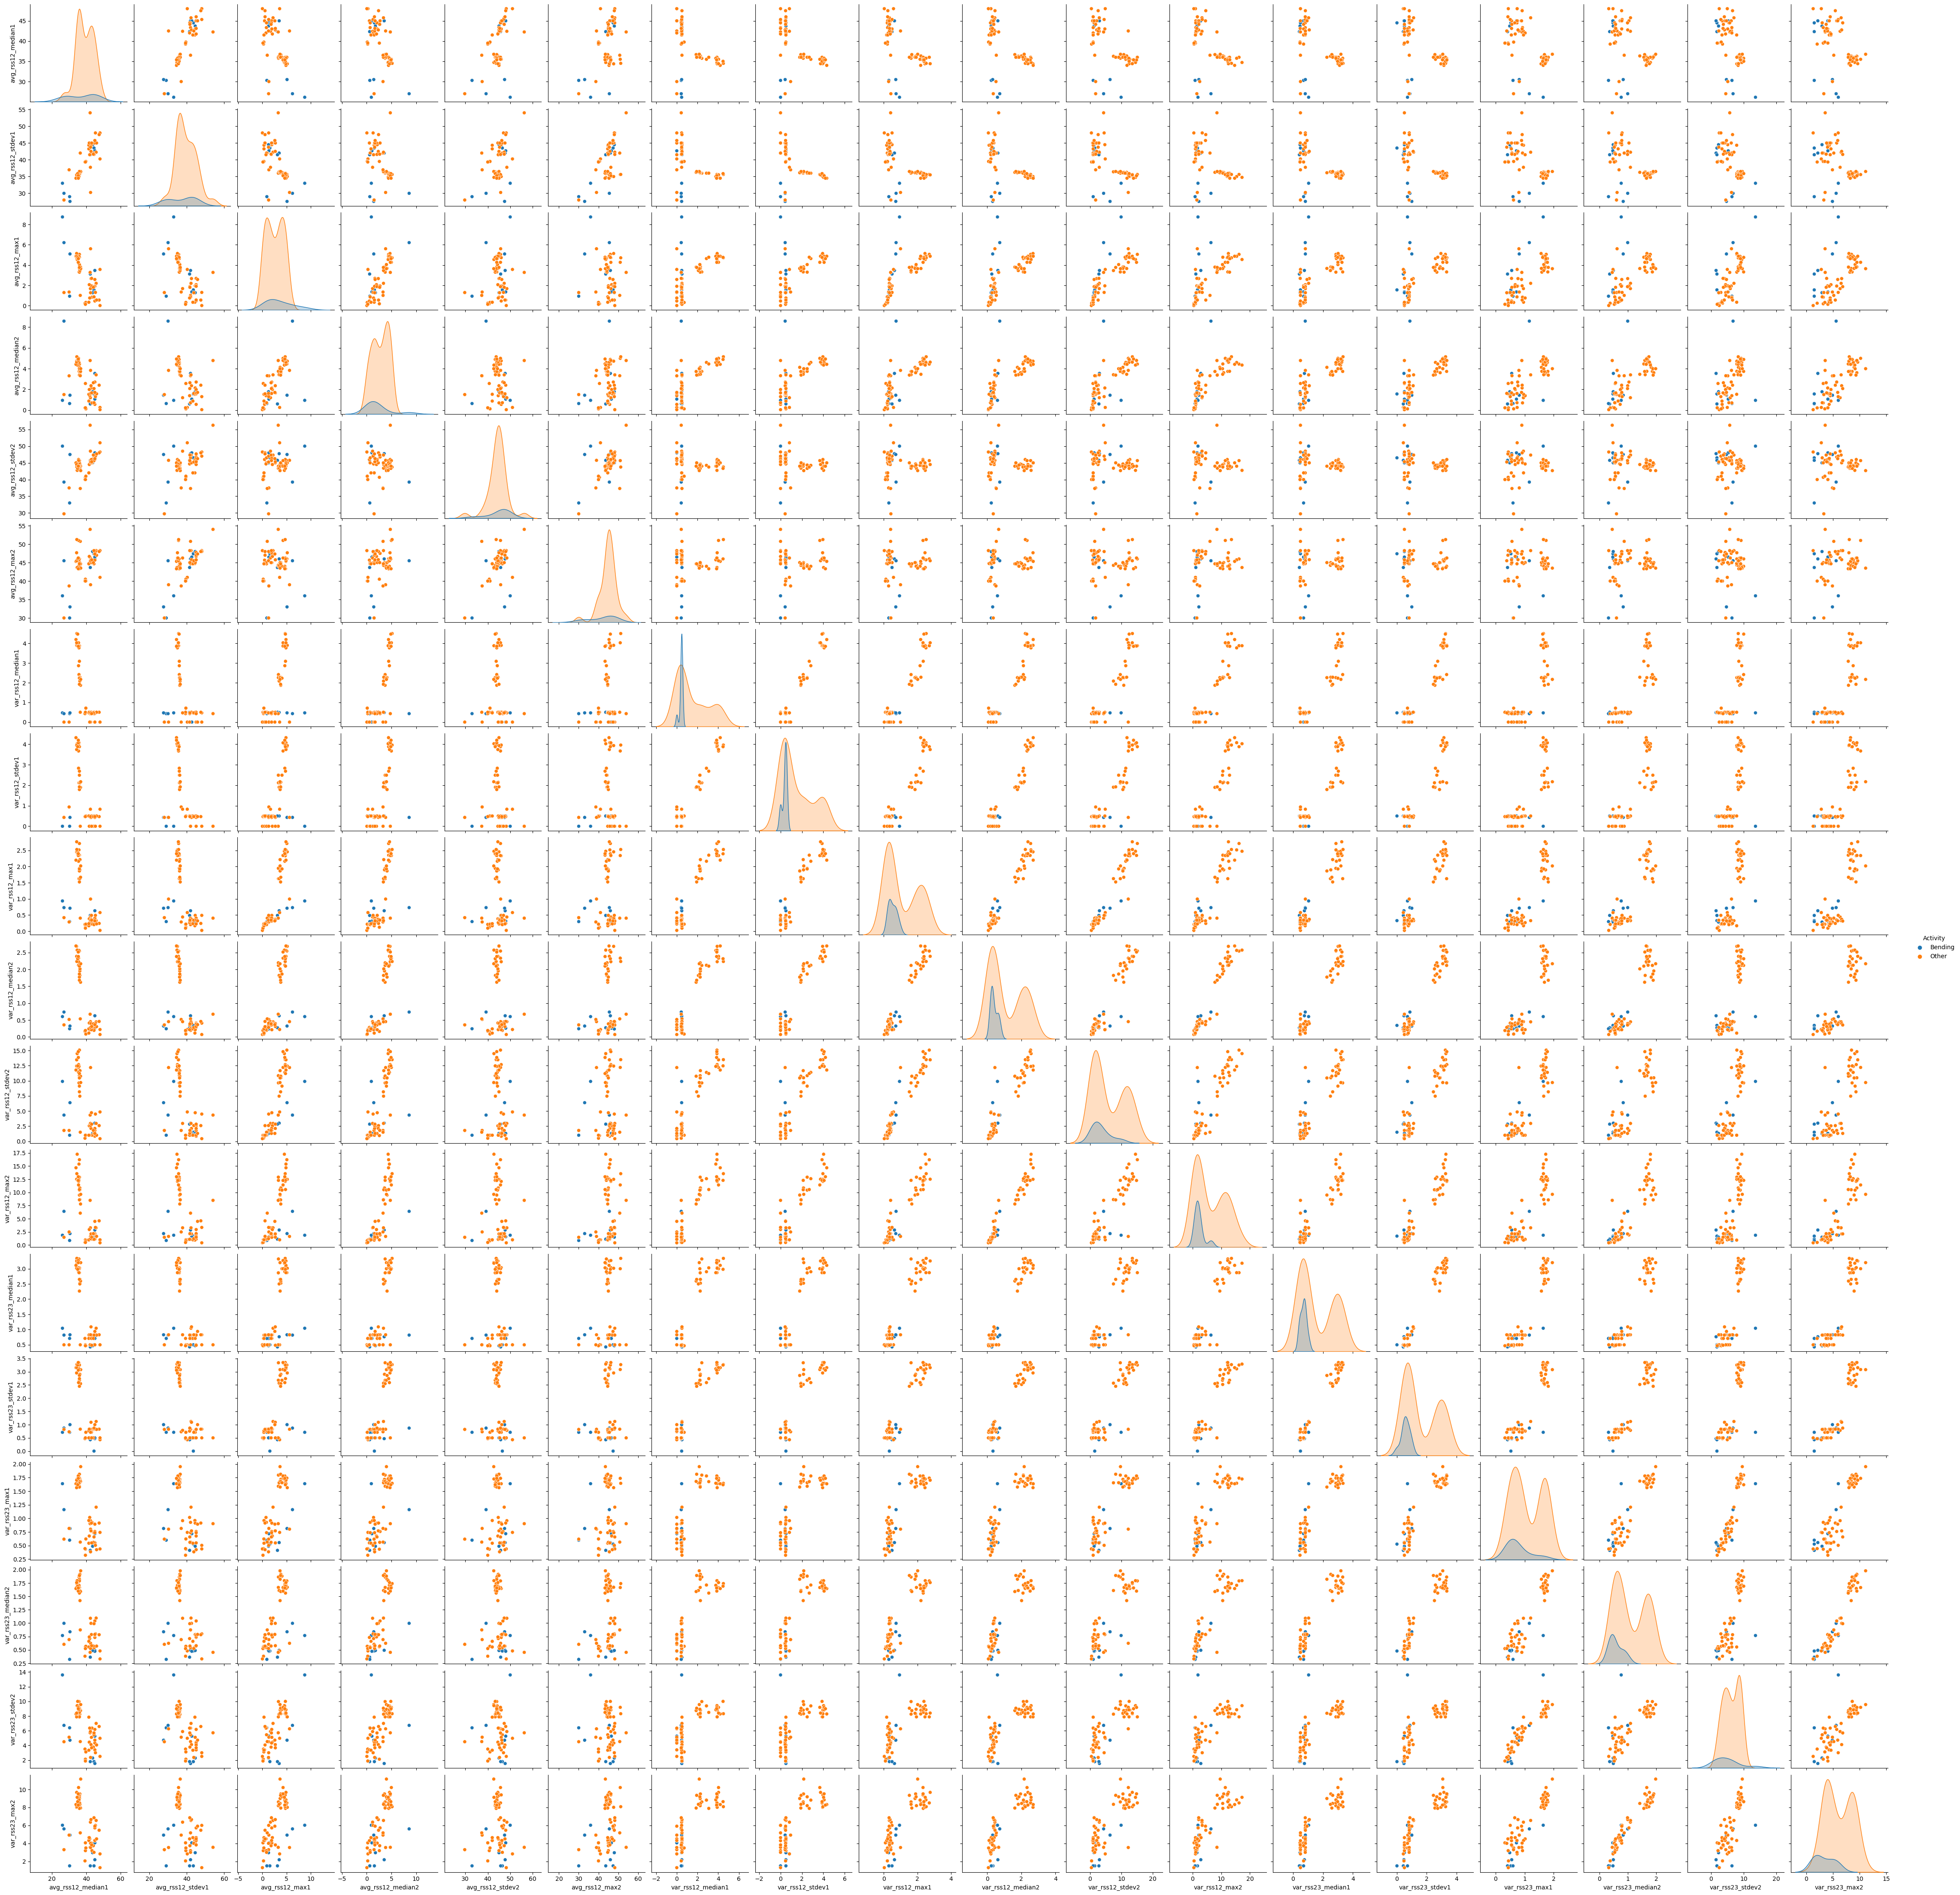

In [26]:
sns.pairplot(combined_half_split_train_df,hue="Activity")

I don't see a significant difference between the two scatter plots of the halved data and the whole data. The individual plots hold roughly the same trend

# 2(a)(iii) Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. 

# Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation.

The right way to do CV in this problem is to do it alonside recursive feature elimination as opposed to the wrong way which is doing them separately. We want to cross validate for every l, p pair.

In [27]:
def splitTrainCreateData(split):
    all_bending1_split_features = []
    for num in range(3, 8):
        bending1_split_train_df = pd.read_csv(f"../data/AReM/bending1/dataset{num}.csv", skiprows=4)
        bending1_split_train_df = bending1_split_train_df.drop(columns="# Columns: time")
        split_dataset_bending1 = np.array_split(bending1_split_train_df, split)

        dataset_bending1_features = []
        for y, section in enumerate(split_dataset_bending1, start=1):
            section_features = {}
            for column in section.columns:
                section_features[f"{column}_std_{y}"] = section[column].std()
                section_features[f"{column}_max_{y}"] = section[column].max()
                section_features[f"{column}_median_{y}"] = section[column].median()

            dataset_bending1_features.append(section_features)

        bending1_features = {}
        for section_dictionary in dataset_bending1_features:
            for key, value in section_dictionary.items():
                bending1_features[key] = value    
        all_bending1_split_features.append(bending1_features)

    bending1_train_features_df = pd.DataFrame(all_bending1_split_features)
    bending1_train_features_df["Activity"] = 1

    
    all_bending2_split_features = []
    for num in range(3, 7):
        bending2_split_train_df = pd.read_csv(f"../data/AReM/bending2/dataset{num}.csv", skiprows=4)
        bending2_split_train_df = bending2_split_train_df.drop(columns="# Columns: time")
        split_dataset_bending2 = np.array_split(bending2_split_train_df, split)

        dataset_bending2_features = []
        for y, section in enumerate(split_dataset_bending2, start=1):
            section_features = {}
            for column in section.columns:
                section_features[f"{column}_std_{y}"] = section[column].std()
                section_features[f"{column}_max_{y}"] = section[column].max()
                section_features[f"{column}_median_{y}"] = section[column].median()

            dataset_bending2_features.append(section_features)

        bending2_features = {}
        for section_dictionary in dataset_bending2_features:
            for key, value in section_dictionary.items():
                bending2_features[key] = value    
        all_bending2_split_features.append(bending2_features)

    bending2_train_features_df = pd.DataFrame(all_bending2_split_features)
    bending2_train_features_df["Activity"] = 1

    
    all_others_split_features = []
    folders = ["cycling", "lying", "sitting", "standing", "walking"]

    for folder in folders:
        for num in range(4, 16):
            others_split_train_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv", skiprows=4)
            others_split_train_df = others_split_train_df.drop(columns="# Columns: time")
            split_dataset_others = np.array_split(others_split_train_df, split)

            dataset_others_features = []
            for y, section in enumerate(split_dataset_others, start=1):
                section_features = {}
                for column in section.columns:
                    section_features[f"{column}_std_{y}"] = section[column].std()
                    section_features[f"{column}_max_{y}"] = section[column].max()
                    section_features[f"{column}_median_{y}"] = section[column].median()

                dataset_others_features.append(section_features)

            others_features = {}
            for section_dictionary in dataset_others_features:
                for key, value in section_dictionary.items():
                    others_features[key] = value    
            all_others_split_features.append(others_features)

    others_train_features_df = pd.DataFrame(all_others_split_features)
    others_train_features_df["Activity"] = 0


    train_data_split_df = pd.concat([bending1_train_features_df, bending2_train_features_df, others_train_features_df], ignore_index=True)
    return train_data_split_df

In [28]:
results=[]
for l in range(1, 21):
    df = splitTrainCreateData(l) 
    y_train = df["Activity"]
    x_train = df.drop(columns="Activity")

    rfecv = RFECV(estimator=LogisticRegression(solver="lbfgs", C=1e9, max_iter=1000), cv=StratifiedKFold(5), scoring="accuracy", n_jobs=-1)
    rfecv = rfecv.fit(x_train, y_train)
    
    cv_scores = rfecv.cv_results_['mean_test_score']
    cv_accuracy = cv_scores[(rfecv.n_features_) - 1]
    
    selected_features = x_train.columns[rfecv.support_]    
     
    results.append({"l": l,"Number of Features": rfecv.n_features_,"Selected Features": list(selected_features),"Selected Features Train CV Accuracy": cv_accuracy})

results_df = pd.DataFrame(results)
display(results_df)

l  Number of Features                                  Selected Features  \
0    1                   4  [avg_rss12_max_1, avg_rss13_median_1, avg_rss2...   
1    2                   4  [avg_rss12_max_1, avg_rss23_max_1, avg_rss23_m...   
2    3                  13  [avg_rss12_max_1, var_rss12_max_1, avg_rss13_m...   
3    4                   8  [avg_rss12_max_1, avg_rss13_median_1, avg_rss2...   
4    5                  17  [avg_rss13_median_1, avg_rss23_max_1, avg_rss2...   
5    6                  16  [avg_rss23_max_1, avg_rss23_median_1, var_rss1...   
6    7                   8  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   
7    8                  11  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   
8    9                  16  [avg_rss23_max_1, avg_rss23_median_1, avg_rss1...   
9   10                  10  [avg_rss23_max_1, avg_rss23_max_2, avg_rss23_m...   
10  11                   5  [avg_rss23_max_1, avg_rss23_median_2, avg_rss2...   
11  12                  14  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   
12  13                   3  [avg_rss23_median_2, avg_rss23_median_4, avg_r...   
13  14                  22  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   
14  15                  22  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   
15  16                   9  [avg_rss23_max_1, avg_rss23_max_2, avg_rss23_m...   
16  17                  55  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   
17  18                  38  [avg_rss23_max_1, avg_rss23_max_2, avg_rss23_m...   
18  19                  22  [avg_rss23_max_1, avg_rss23_max_2, avg_rss23_m...   
19  20                  45  [avg_rss23_max_1, avg_rss23_median_1, avg_rss2...   

    Selected Features Train CV Accuracy  
0                              0.942857  
1                              0.985714  
2                              0.985714  
3                              0.985714  
4                              0.985714  
5                              0.985714  
6                              0.985714  
7                              0.985714  
8                              0.985714  
9                              0.971429  
10                             0.971429  
11                             0.985714  
12                             0.971429  
13                             0.985714  
14                             0.985714  
15                             0.985714  
16                             0.985714  
17                             0.985714  
18                             0.985714  
19                             0.985714

In [29]:
features = pd.DataFrame(results_df.iloc[1]).transpose()
value = features.loc[1, 'Selected Features']
print(value)

['avg_rss12_max_1', 'avg_rss23_max_1', 'avg_rss23_median_1', 'var_rss23_max_2']


Prior to setting max_iter to be 1000 I was receivimg the warning STOP: TOTAL NO. of ITERATIONS REACHED LIMIT which indicates that the data is linearly separable.

4 features were selected with l=2. These 4 features gave the highest train cross validation accuracy (0.9857) with the smallest amount of features used.

# 2(a)(iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

         Current function value: 0.000002
         Iterations: 15
                           Logit Regression Results                           
Dep. Variable:               Activity   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        23:24:27   Log-Likelihood:            -0.00014892
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 6.910e-11
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -72.9651   1093.932     -0.067      0.947   -2217.033    2071.103
avg_rss12_max_1       -4.4920     53.740 

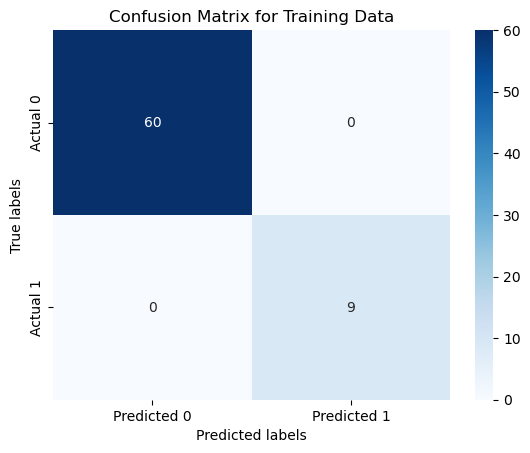


The Train Accuracy for the best L(=2) is 1.0



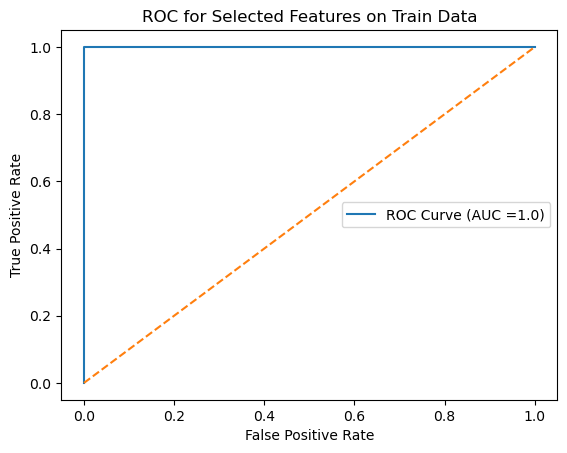

In [30]:
from sklearn.metrics import accuracy_score
df = splitTrainCreateData(2) 
y_train = df["Activity"]
x_train = df.drop(columns="Activity")
x_train_best = x_train[['avg_rss12_max_1', 'avg_rss23_max_1', 'avg_rss23_median_1', 'var_rss23_max_2']]
x_train_best_const = sm.add_constant(x_train_best)
model = sm.Logit(y_train, x_train_best_const).fit(maxiter=15)
print(model.summary())

y_train_pred = model.predict(x_train_best_const)
roc_auc = roc_auc_score(y_train, y_train_pred)
fpr_best, tpr_best, thresholds_best = roc_curve(y_train, y_train_pred)
y_train_pred_rounded = np.round(y_train_pred).astype(int)



conf_mat = confusion_matrix(y_train, y_train_pred_rounded)
print()
sns.heatmap(conf_mat,annot=True, cmap="Blues",xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
print()

accuracy_refit = accuracy_score(y_train,y_train_pred_rounded)
print("The Train Accuracy for the best L(=2) is",accuracy_refit)

print()
plt.figure()
plt.plot(fpr_best, tpr_best, label=f'ROC Curve (AUC ={roc_auc})')
plt.plot([0, 1], [0, 1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Selected Features on Train Data')
plt.legend(loc="center right")
plt.show()

Log regression only worked after setting maxiter to be 15. From above we can see the regression does not work as intended as there is perfect prediction or complete separation which resulted in the parameters and Maximum Likelihood Estimator not being identified.

I got 1.0 for train accuracy and 1.0 for train AUC when l=2.

# 2(a)(v) Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [31]:
def splitTestCreateData(split):
    all_bending_split_features = []

    folders_bending = ["bending1","bending2"]
    for folder in folders_bending:   
        for num in range(1, 3):
            bending_split_test_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv", skiprows=4)
            bending_split_test_df = bending_split_test_df.drop(columns="# Columns: time")
            split_dataset_bending = np.array_split(bending_split_test_df, split)

            dataset_bending_features = []
            for y, section in enumerate(split_dataset_bending, start=1):
                section_features = {}
                for column in section.columns:
                    section_features[f"{column}_std_{y}"] = section[column].std()
                    section_features[f"{column}_max_{y}"] = section[column].max()
                    section_features[f"{column}_median_{y}"] = section[column].median()

                dataset_bending_features.append(section_features)

            bending_features = {}
            for section_dictionary in dataset_bending_features:
                for key, value in section_dictionary.items():
                    bending_features[key] = value    
            all_bending_split_features.append(bending_features)

        bending_test_features_df = pd.DataFrame(all_bending_split_features)
        bending_test_features_df["Activity"] = 1


    all_others_split_features = []
    folders = ["cycling", "lying", "sitting", "standing", "walking"]

    for folder in folders:
        for num in range(1, 4):
            others_split_test_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv", skiprows=4)
            others_split_test_df = others_split_test_df.drop(columns="# Columns: time")
            split_dataset_others = np.array_split(others_split_test_df, split)

            dataset_others_features = []
            for y, section in enumerate(split_dataset_others, start=1):
                section_features = {}
                for column in section.columns:
                    section_features[f"{column}_std_{y}"] = section[column].std()
                    section_features[f"{column}_max_{y}"] = section[column].max()
                    section_features[f"{column}_median_{y}"] = section[column].median()

                dataset_others_features.append(section_features)

            others_features = {}
            for section_dictionary in dataset_others_features:
                for key, value in section_dictionary.items():
                    others_features[key] = value    
            all_others_split_features.append(others_features)

    others_test_features_df = pd.DataFrame(all_others_split_features)
    others_test_features_df["Activity"] = 0

    test_data_split_df = pd.concat([bending_test_features_df, others_test_features_df], ignore_index=True)
    return test_data_split_df

In [32]:
df_test = splitTestCreateData(2)
classifier_x = df_test[['avg_rss12_max_1', 'avg_rss23_max_1', 'avg_rss23_median_1', 'var_rss23_max_2']]
y_test = df_test["Activity"]
x_test_const = sm.add_constant(classifier_x)
y_test_pred = model.predict(x_test_const)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
print(y_test_pred_rounded)

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64


In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_test_pred_rounded)
print("Test Accuracy is",accuracy)

Test Accuracy is 1.0


In [34]:
comparison_df = pd.DataFrame(results_df.iloc[1]).transpose()
auc = roc_auc_score(y_test,y_test_pred)
comparison_df["Refit with Selected Features Train Accuracy"]=accuracy_refit
comparison_df["Refit with Selected Features Train AUC"]=roc_auc
comparison_df["Selected Features Test Accuracy"]=accuracy
comparison_df["Selected Features Test AUC"]=auc
display(comparison_df)

l Number of Features                                  Selected Features  \
1  2                  4  [avg_rss12_max_1, avg_rss23_max_1, avg_rss23_m...   

  Selected Features Train CV Accuracy  \
1                            0.985714   

   Refit with Selected Features Train Accuracy  \
1                                          1.0   

   Refit with Selected Features Train AUC  Selected Features Test Accuracy  \
1                                     1.0                              1.0   

   Selected Features Test AUC  
1                         1.0

From the initial log regression fitting to find the best L and best features for prediction, I received a train CV accuracy of 0.9857 for l=2 with the 4 features ('avg_rss12_max_1', 'avg_rss23_max_1', 'avg_rss23_median_1', 'var_rss23_max_2'). After refitting a logistic regression model with the best features and l=2, I received a train accuracy and train AUC of 1.0. 

After using this refit log regression model to predict on my test data using the selected features, I again received a test accuracy and test AUC of 1.

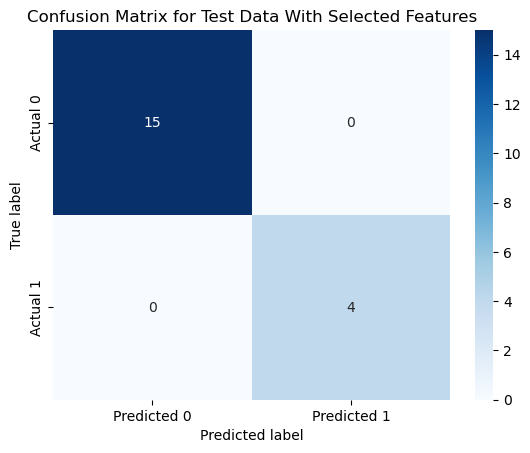

In [35]:
conf_matrix = confusion_matrix(y_test, y_test_pred_rounded)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Test Data With Selected Features')
plt.show()

There is perfect prediction and class imbalance as Class 1 (Bending) has only 4 cases while Class 0 (others) have 15

# 2(a)(vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes the classes are completely separated and they do cause instability in calculating logistic regression parameters. Max iter had to be set to 15 to allow for calculations.

# 2(a)(vii) From the confusion matrices you obtained, do you see imbalanced classes?

Yes, in the testing set I believe the class Bending (composed of bending1 and bending2) only has 4 instances as compared to the Other Classes which have 15 instances total. 

In the training set, the bending class only has 9 instances while the other classes have 60 instances.

# If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

SMOTE uses nearest neighbors to synthetically create more samples of the rare instances, in this case bending to help with the imbalance of classes. SMOTE will make the train data more balanced.

In [36]:
results=[]
for l in range(1, 21):
    df = splitTrainCreateData(l) 
    y_train = df["Activity"]
    x_train = df.drop(columns="Activity")
    
    smote = SMOTE(random_state=24)
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    rfecv = RFECV(estimator=LogisticRegression(solver="lbfgs", max_iter=1000), cv=StratifiedKFold(5), scoring="accuracy", n_jobs=-1)
    rfecv = rfecv.fit(x_train_smote, y_train_smote)
    
    cv_scores = rfecv.cv_results_['mean_test_score']
    cv_accuracy = cv_scores[(rfecv.n_features_) - 1]

    selected_features = x_train.columns[rfecv.support_]
    
    n_features = rfecv.n_features_

    results.append({ "l": l,"Number of Features": n_features,"Selected Features": list(selected_features),"Selected Features Train CV Accuracy": cv_accuracy})

results_df = pd.DataFrame(results)

display(results_df)

l  Number of Features                                  Selected Features  \
0    1                   5  [avg_rss12_median_1, var_rss12_max_1, avg_rss1...   
1    2                   5  [avg_rss13_median_1, avg_rss23_max_1, avg_rss2...   
2    3                  17  [avg_rss12_median_1, var_rss12_max_1, avg_rss1...   
3    4                   5  [avg_rss23_max_1, avg_rss23_median_1, var_rss2...   
4    5                   5  [avg_rss13_median_1, avg_rss23_max_1, avg_rss2...   
5    6                  10  [avg_rss13_median_1, avg_rss23_max_1, avg_rss2...   
6    7                   6  [avg_rss23_max_1, var_rss12_max_2, avg_rss23_m...   
7    8                   9  [avg_rss23_max_1, var_rss12_max_2, avg_rss23_m...   
8    9                  12  [avg_rss23_max_1, avg_rss23_max_2, avg_rss23_m...   
9   10                   4  [avg_rss23_max_1, avg_rss23_median_2, avg_rss1...   
10  11                   4  [avg_rss23_max_2, avg_rss23_median_2, avg_rss2...   
11  12                   7  [avg_rss23_max_2, avg_rss23_median_2, avg_rss2...   
12  13                   5  [avg_rss23_max_2, avg_rss23_median_2, avg_rss1...   
13  14                   5  [avg_rss23_max_2, avg_rss23_median_2, avg_rss1...   
14  15                   3  [avg_rss23_median_2, avg_rss23_median_5, avg_r...   
15  16                   9  [avg_rss23_max_1, avg_rss23_max_2, avg_rss23_m...   
16  17                   4  [avg_rss23_median_3, avg_rss23_median_5, avg_r...   
17  18                   4  [avg_rss23_max_3, avg_rss23_median_3, avg_rss2...   
18  19                   4  [avg_rss23_max_3, avg_rss23_median_3, avg_rss2...   
19  20                   3  [avg_rss23_median_3, avg_rss12_max_16, avg_rss...   

    Selected Features Train CV Accuracy  
0                              0.983333  
1                              0.983333  
2                              0.991667  
3                              0.991667  
4                              0.991667  
5                              1.000000  
6                              1.000000  
7                              1.000000  
8                              1.000000  
9                              0.991667  
10                             0.991667  
11                             1.000000  
12                             1.000000  
13                             0.991667  
14                             0.991667  
15                             1.000000  
16                             0.991667  
17                             0.991667  
18                             0.991667  
19                             0.991667

In [37]:
best_feature_df = pd.DataFrame(results_df.iloc[12]).transpose()
value = best_feature_df.loc[12, 'Selected Features']
print(value)

['avg_rss23_max_2', 'avg_rss23_median_2', 'avg_rss12_max_7', 'avg_rss23_median_12', 'var_rss23_max_12']


These 5 features were determined to be the best features for classifying bending vs others. The split l=13 with these 5 features produced a Train Cross Validation Accuracy of 1.0. Although many produced 1.0, l=13 used the least amount of features thus suggesting a simpler model.

In [38]:
df = splitTrainCreateData(13) 
y_train = df["Activity"]
x_train_best = x_train[['avg_rss23_max_2', 'avg_rss23_median_2', 'avg_rss12_max_7', 'avg_rss23_median_12', 'var_rss23_max_12']]
smote = SMOTE(random_state=24)
x_train_smote, y_train_smote = smote.fit_resample(x_train_best, y_train)
x_train_const = sm.add_constant(x_train_smote)
model_smote = sm.Logit(y_train_smote, x_train_const).fit()
model_smote.summary()

Optimization terminated successfully.
         Current function value: 0.054191
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Activity   No. Observations:                  120
Model:                          Logit   Df Residuals:                      114
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                  0.9218
Time:                        23:24:59   Log-Likelihood:                -6.5029
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 2.585e-31
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.4155     17.942     -0.636      0.525     -46.581      23.750
avg_rss23_max_2         1.3502      1.189      1.136      0.256      -0.980       3.680
avg_rss23_median_2      2.7014      1.516      1.782      0.075      -0.269       5.672
avg_rss12_max_7        -1.3319      0.909     -1.465      0.143      -3.114       0.451
avg_rss23_median_12    -1.0100      0.856     -1.180      0.238      -2.688       0.668
var_rss23_max_12       -0.2496      0.396     -0.630      0.529      -1.026       0.527
=======================================================================================

Possibly complete quasi-separation: A fraction 0.71 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
from sklearn.metrics import accuracy_score

Test Accuracy of Logistic Regression Model Trained Using SMOTE Train Data: 0.947


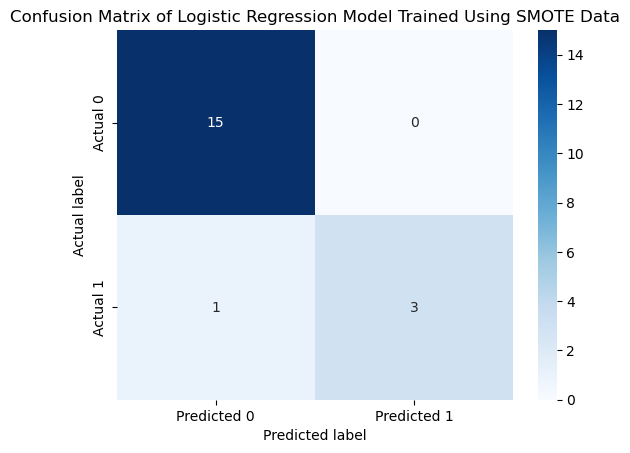

In [40]:
df_smote = splitTestCreateData(13) 
x_test_smote = df_smote[['avg_rss23_max_2', 'avg_rss23_median_2', 'avg_rss12_max_7', 'avg_rss23_median_12', 'var_rss23_max_12']]
y_test_smote = df_smote["Activity"]
x_test_const_smote = sm.add_constant(x_test_smote)
y_test_smote_prob = model_smote.predict(x_test_const_smote)
y_test_prob_smote_rounded = np.round(y_test_smote_prob).astype(int)


accuracy = accuracy_score(y_test_smote,y_test_prob_smote_rounded)
print("Test Accuracy of Logistic Regression Model Trained Using SMOTE Train Data:", round(accuracy,3))


conf_mat = confusion_matrix(y_test_smote, y_test_prob_smote_rounded)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix of Logistic Regression Model Trained Using SMOTE Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

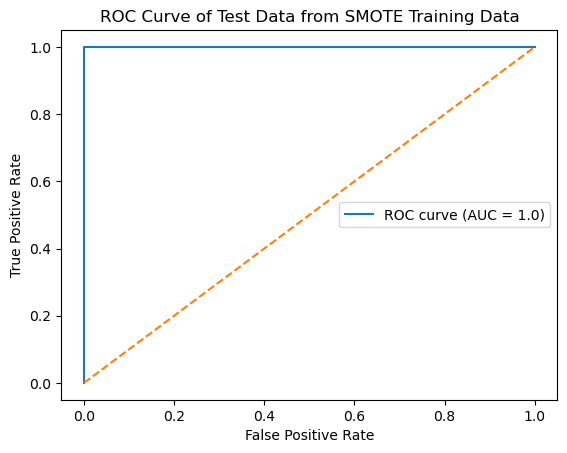

In [41]:
auc = roc_auc_score(y_test_smote,y_test_smote_prob)
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test_smote,y_test_smote_prob)
plt.figure()
plt.plot(fpr_smote, tpr_smote, label=f'ROC curve (AUC = {round(auc,2)})')
plt.plot([0, 1], [0, 1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Test Data from SMOTE Training Data')
plt.legend(loc="center right")
plt.show()

# 2(b)(i) Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
results = []
for l in range(1, 21):
    df = splitTrainCreateData(l)
    y_train = df["Activity"]
    x_train = df.drop(columns="Activity")
    
    scaler = StandardScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    model = LogisticRegressionCV(cv=StratifiedKFold(5),penalty='l1', solver='liblinear', max_iter=1000)
    model = model.fit(x_train_scaled,y_train)
    
    
    df_test = splitTestCreateData(l)
    y_test = df_test["Activity"]
    x_test = df_test.drop(columns="Activity")
    x_test_scaled = scaler.transform(x_test)
    y_pred_l1 = model.predict(x_test_scaled)
    y_train_pred =  model.predict(x_train_scaled)
    
    test_score_test = accuracy_score(y_test, y_pred_l1)
    test_score_train = accuracy_score(y_train, y_train_pred)

    results.append({"L":l,"Train Accuracy":test_score_train,"Test Accuracy":test_score_test})
results_df = pd.DataFrame(results)
display(results_df)

L  Train Accuracy  Test Accuracy
0    1        0.985507       0.947368
1    2        0.956522       0.947368
2    3        0.971014       0.894737
3    4        0.971014       0.947368
4    5        1.000000       0.947368
5    6        1.000000       0.947368
6    7        0.985507       0.947368
7    8        0.985507       0.947368
8    9        0.985507       0.947368
9   10        1.000000       0.947368
10  11        1.000000       0.947368
11  12        1.000000       0.947368
12  13        0.985507       0.947368
13  14        0.985507       0.947368
14  15        1.000000       0.947368
15  16        1.000000       0.947368
16  17        1.000000       0.947368
17  18        1.000000       0.894737
18  19        1.000000       0.947368
19  20        1.000000       0.947368

# 2(b)(ii)Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

l1 Penalized regression was easier to implement as we are not pruning features. L1 regression also performed signficantly better when comparing train accuracy. L1 regression produced a signficant amount of 1.0 values for train accuracy suggesting it performs better.

# 2(c)(i)Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [44]:
def splitTrainCreateDataMultinomial(split):
    train_dataframes = []

    all_bending1_split_features = []
    for num in range(3, 8):  
        bending1_split_train_df = pd.read_csv(f"../data/AReM/bending1/dataset{num}.csv", skiprows=4)
        bending1_split_train_df = bending1_split_train_df.drop(columns="# Columns: time")
        split_dataset_bending1 = np.array_split(bending1_split_train_df, split)

        dataset_bending1_features = []
        for y, section in enumerate(split_dataset_bending1, start=1):
            section_features = {}
            for column in section.columns:
                section_features[f"{column}_std_{y}"] = section[column].std()
                section_features[f"{column}_max_{y}"] = section[column].max()
                section_features[f"{column}_median_{y}"] = section[column].median()

            dataset_bending1_features.append(section_features)

        bending1_features = {}
        for section_dictionary in dataset_bending1_features:
            for key, value in section_dictionary.items():
                bending1_features[key] = value    
        all_bending1_split_features.append(bending1_features)

    bending1_train_features_df = pd.DataFrame(all_bending1_split_features)
    bending1_train_features_df["Activity"] = "bending"
    train_dataframes.append(bending1_train_features_df)

    all_bending2_split_features = []
    for num in range(3, 7):  
        bending2_split_train_df = pd.read_csv(f"../data/AReM/bending2/dataset{num}.csv", skiprows=4)
        bending2_split_train_df = bending2_split_train_df.drop(columns="# Columns: time")
        split_dataset_bending2 = np.array_split(bending2_split_train_df, split)

        dataset_bending2_features = []
        for y, section in enumerate(split_dataset_bending2, start=1):
            section_features = {}
            for column in section.columns:
                section_features[f"{column}_std_{y}"] = section[column].std()
                section_features[f"{column}_max_{y}"] = section[column].max()
                section_features[f"{column}_median_{y}"] = section[column].median()

            dataset_bending2_features.append(section_features)

        bending2_features = {}
        for section_dictionary in dataset_bending2_features:
            for key, value in section_dictionary.items():
                bending2_features[key] = value    
        all_bending2_split_features.append(bending2_features)

    bending2_train_features_df = pd.DataFrame(all_bending2_split_features)
    bending2_train_features_df["Activity"] = "bending"
    train_dataframes.append(bending2_train_features_df)

    folders = ["cycling", "lying", "sitting", "standing", "walking"]
    for folder in folders:
        all_others_split_features = [] 
        for num in range(4, 16):
            others_split_train_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv", skiprows=4)
            others_split_train_df = others_split_train_df.drop(columns="# Columns: time")
            split_dataset_others = np.array_split(others_split_train_df, split)

            dataset_others_features = []
            for y, section in enumerate(split_dataset_others, start=1):
                section_features = {}
                for column in section.columns:
                    section_features[f"{column}_std_{y}"] = section[column].std()
                    section_features[f"{column}_max_{y}"] = section[column].max()
                    section_features[f"{column}_median_{y}"] = section[column].median()

                dataset_others_features.append(section_features)

            others_features = {}
            for section_dictionary in dataset_others_features:
                for key, value in section_dictionary.items():
                    others_features[key] = value    
            all_others_split_features.append(others_features)

        others_train_features_df = pd.DataFrame(all_others_split_features)
        others_train_features_df["Activity"] = folder
        train_dataframes.append(others_train_features_df) 

    train_data_split_df = pd.concat(train_dataframes, ignore_index=True)
    return train_data_split_df

In [45]:
def splitTestCreateDataMultinomial(split):
    test_dataframes = []
    folders_bending = ["bending1", "bending2"]

    for folder in folders_bending:
        all_bending_split_features = []  
        for num in range(1, 3):
            bending_split_test_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv", skiprows=4)
            bending_split_test_df = bending_split_test_df.drop(columns="# Columns: time")
            split_dataset_bending = np.array_split(bending_split_test_df, split)

            dataset_bending_features = []
            for y, section in enumerate(split_dataset_bending, start=1):
                section_features = {}
                for column in section.columns:
                    section_features[f"{column}_std_{y}"] = section[column].std()
                    section_features[f"{column}_max_{y}"] = section[column].max()
                    section_features[f"{column}_median_{y}"] = section[column].median()
                dataset_bending_features.append(section_features)

            bending_features = {}
            for section_dictionary in dataset_bending_features:
                for key, value in section_dictionary.items():
                    bending_features[key] = value
            all_bending_split_features.append(bending_features)

        bending_test_features_df = pd.DataFrame(all_bending_split_features)
        bending_test_features_df["Activity"] = "bending"
        test_dataframes.append(bending_test_features_df)

    folders = ["cycling", "lying", "sitting", "standing", "walking"]
    for folder in folders:
        all_others_split_features = [] 
        for num in range(1, 4):
            others_split_test_df = pd.read_csv(f"../data/AReM/{folder}/dataset{num}.csv", skiprows=4)
            others_split_test_df = others_split_test_df.drop(columns="# Columns: time")
            split_dataset_others = np.array_split(others_split_test_df, split)

            dataset_others_features = []
            for y, section in enumerate(split_dataset_others, start=1):
                section_features = {}
                for column in section.columns:
                    section_features[f"{column}_std_{y}"] = section[column].std()
                    section_features[f"{column}_max_{y}"] = section[column].max()
                    section_features[f"{column}_median_{y}"] = section[column].median()
                dataset_others_features.append(section_features)

            others_features = {}
            for section_dictionary in dataset_others_features:
                for key, value in section_dictionary.items():
                    others_features[key] = value
            all_others_split_features.append(others_features)

        others_test_features_df = pd.DataFrame(all_others_split_features)
        others_test_features_df["Activity"] = folder
        test_dataframes.append(others_test_features_df)

    test_data_split_df = pd.concat(test_dataframes, ignore_index=True)
    return test_data_split_df

In [46]:
from sklearn.metrics import accuracy_score
results = []
for l in range(1, 21):
    df = splitTrainCreateDataMultinomial(l)
    y_train = df["Activity"]
    x_train = df.drop(columns="Activity")
    
    scaler = StandardScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    model = LogisticRegressionCV(cv=StratifiedKFold(5),penalty='l1', solver='saga', max_iter=1000, multi_class='multinomial')
    model = model.fit(x_train_scaled,y_train)
    
    
    df_test = splitTestCreateDataMultinomial(l)
    y_test = df_test["Activity"]
    x_test = df_test.drop(columns="Activity")
    x_test_scaled = scaler.transform(x_test)
    y_pred_l1 = model.predict(x_test_scaled)
    y_train_pred =  model.predict(x_train_scaled)
    

    test_score_test = accuracy_score(y_test, y_pred_l1)
    test_score_train = accuracy_score(y_train, y_train_pred)
    test_error = 1 - test_score_test

    results.append({"L":l,"Train Accuracy":test_score_train,"Test Accuracy":test_score_test,"Test Error":test_error})
    
results_df = pd.DataFrame(results)

display(results_df)

L  Train Accuracy  Test Accuracy  Test Error
0    1        0.985507       0.947368    0.052632
1    2        1.000000       0.842105    0.157895
2    3        1.000000       0.894737    0.105263
3    4        1.000000       0.842105    0.157895
4    5        1.000000       0.842105    0.157895
5    6        0.985507       0.842105    0.157895
6    7        1.000000       0.789474    0.210526
7    8        1.000000       0.736842    0.263158
8    9        0.985507       0.894737    0.105263
9   10        1.000000       0.842105    0.157895
10  11        0.985507       0.736842    0.263158
11  12        1.000000       0.789474    0.210526
12  13        0.985507       0.842105    0.157895
13  14        1.000000       0.894737    0.105263
14  15        0.985507       0.842105    0.157895
15  16        1.000000       0.736842    0.263158
16  17        1.000000       0.789474    0.210526
17  18        1.000000       0.842105    0.157895
18  19        1.000000       0.789474    0.210526
19  20        1.000000       0.842105    0.157895

The best l appears to be 1 as it has the highest test accuracy/lowest test error.

Test Accuracy is: 0.9473684210526315 
Test Error is 0.052631578947368474


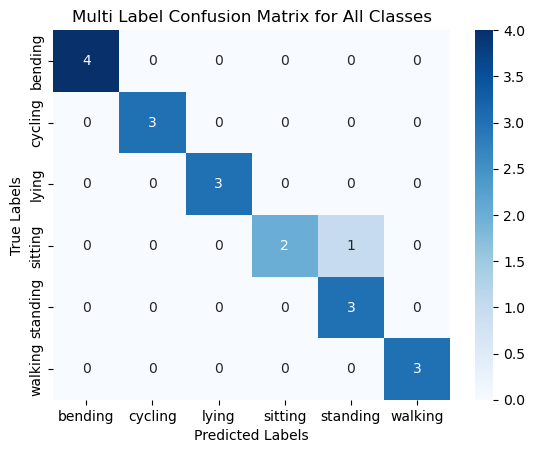

In [47]:
df = splitTrainCreateDataMultinomial(1)
y_train = df["Activity"]
x_train = df.drop(columns="Activity")
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
model = LogisticRegressionCV(cv=StratifiedKFold(5),penalty='l1', solver='saga', max_iter=1000, multi_class='multinomial')
model = model.fit(x_train_scaled,y_train)


df_test = splitTestCreateDataMultinomial(1)
y_test = df_test["Activity"]
x_test = df_test.drop(columns="Activity")
x_test_scaled = scaler.transform(x_test)
y_pred_l1 = model.predict(x_test_scaled)


test_accuracy = accuracy_score(y_test, y_pred_l1)
print(f"Test Accuracy is: {test_accuracy} \nTest Error is {1-test_accuracy}")


conf_matrix = confusion_matrix(y_test, y_pred_l1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Multi Label Confusion Matrix for All Classes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Class 1: Bending 
Class 2: Cycling 
Class 3: Lying 
Class 4: Sitting 
Class 5: Standing 
Class 6: Walking


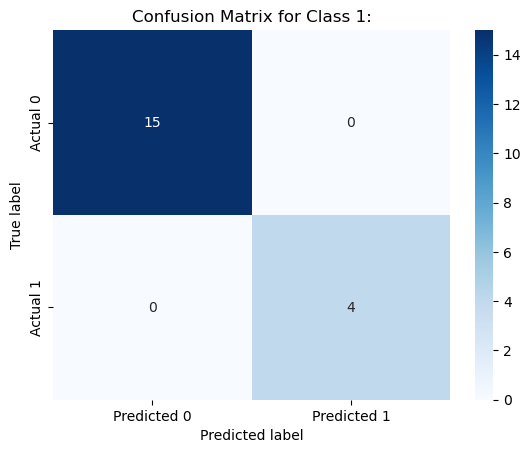

Class 1: Bending 
Class 2: Cycling 
Class 3: Lying 
Class 4: Sitting 
Class 5: Standing 
Class 6: Walking


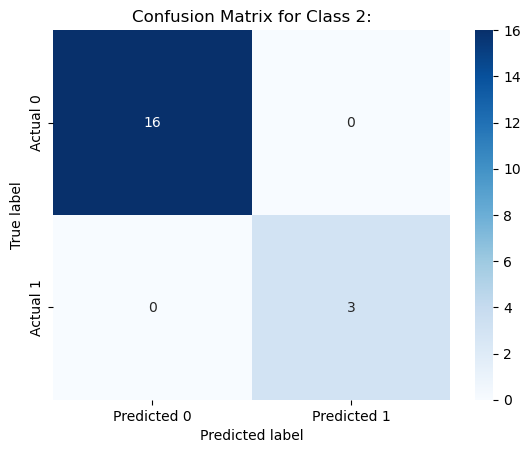

Class 1: Bending 
Class 2: Cycling 
Class 3: Lying 
Class 4: Sitting 
Class 5: Standing 
Class 6: Walking


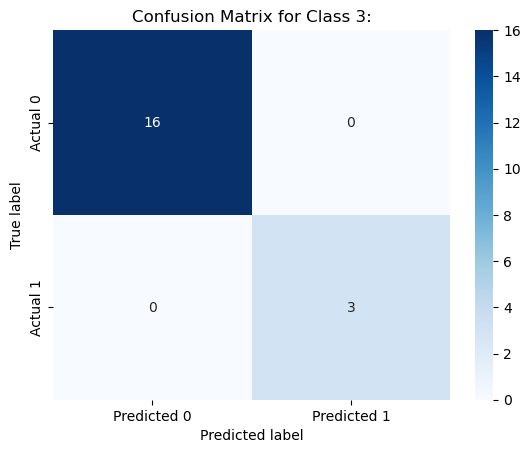

Class 1: Bending 
Class 2: Cycling 
Class 3: Lying 
Class 4: Sitting 
Class 5: Standing 
Class 6: Walking


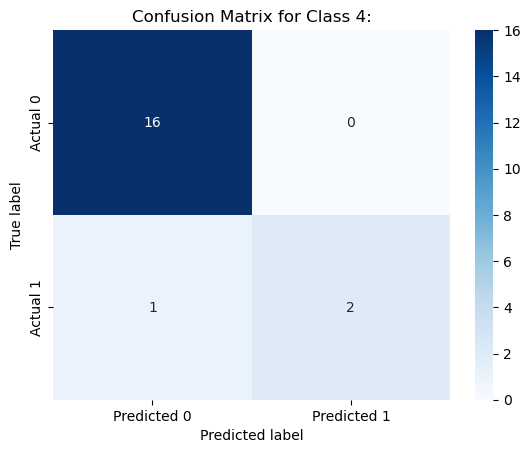

Class 1: Bending 
Class 2: Cycling 
Class 3: Lying 
Class 4: Sitting 
Class 5: Standing 
Class 6: Walking


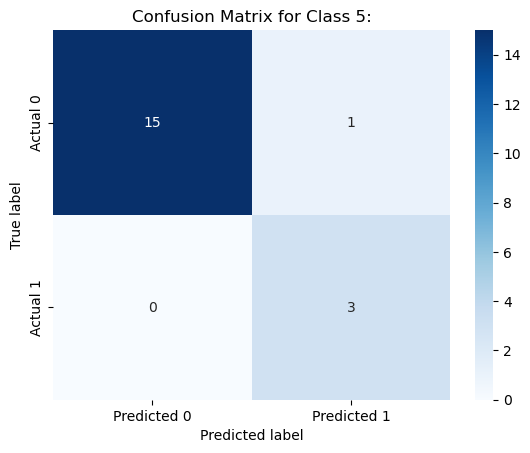

Class 1: Bending 
Class 2: Cycling 
Class 3: Lying 
Class 4: Sitting 
Class 5: Standing 
Class 6: Walking


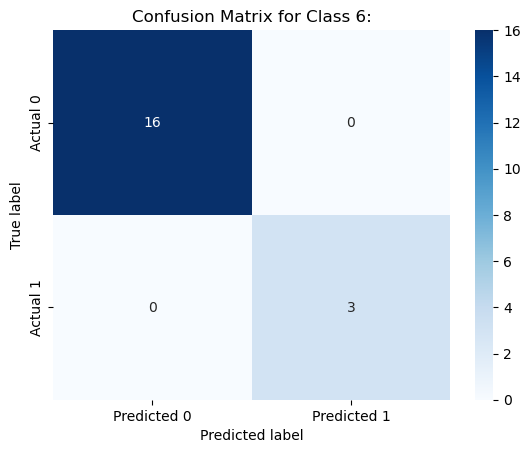

In [48]:
from sklearn.metrics import multilabel_confusion_matrix
multinomial_conf_matrix_test = multilabel_confusion_matrix(y_test, y_pred_l1)
for n,conf_mat in enumerate(multinomial_conf_matrix_test,start=1):
    print("Class 1: Bending","\nClass 2: Cycling", "\nClass 3: Lying","\nClass 4: Sitting","\nClass 5: Standing", "\nClass 6: Walking")
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for Class {n}:')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 2(c)(ii) Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [49]:
from sklearn.metrics import accuracy_score
results_gaussian_nb = [] 
for l in range(1, 21):
    df_train = splitTrainCreateDataMultinomial(l)
    y_train = df_train["Activity"]
    x_train = df_train.drop(columns="Activity")
    
    scaler = MinMaxScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    
    df_test = splitTestCreateDataMultinomial(l)
    y_test = df_test["Activity"]
    
    x_test = df_test.drop(columns="Activity")
    x_test_scaled = scaler.transform(x_test)
    
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(x_train_scaled, y_train)
    y_pred_test_gnb = gaussian_nb.predict(x_test_scaled)
    y_pred_train_gnb = gaussian_nb.predict(x_train_scaled)
    
    accuracy_train_gaussian_nb = accuracy_score(y_train, y_pred_train_gnb)
    accuracy_test_gaussian_nb = accuracy_score(y_test, y_pred_test_gnb)
    
    results_gaussian_nb.append({ "L": l,"Train Accuracy": accuracy_train_gaussian_nb,"Test Accuracy": accuracy_test_gaussian_nb,"Test Error": 1 - accuracy_test_gaussian_nb})
    
results_df_gaussian_nb = pd.DataFrame(results_gaussian_nb)

display(results_df_gaussian_nb)

L  Train Accuracy  Test Accuracy  Test Error
0    1        0.971014       0.947368    0.052632
1    2        0.985507       0.947368    0.052632
2    3        0.985507       0.894737    0.105263
3    4        0.985507       0.894737    0.105263
4    5        0.985507       0.894737    0.105263
5    6        0.985507       0.894737    0.105263
6    7        0.985507       0.842105    0.157895
7    8        0.985507       0.842105    0.157895
8    9        0.985507       0.842105    0.157895
9   10        0.985507       0.894737    0.105263
10  11        0.985507       0.842105    0.157895
11  12        0.985507       0.842105    0.157895
12  13        0.985507       0.842105    0.157895
13  14        0.985507       0.894737    0.105263
14  15        0.985507       0.842105    0.157895
15  16        0.985507       0.842105    0.157895
16  17        0.985507       0.842105    0.157895
17  18        0.985507       0.842105    0.157895
18  19        0.985507       0.842105    0.157895
19  20        1.000000       0.842105    0.157895

Best l is 2 with highest train accuracy, test accuracy.

In [50]:
from sklearn.metrics import accuracy_score
results_multinomial_nb = [] 
for l in range(1, 21):
    df_train = splitTrainCreateDataMultinomial(l)
    y_train = df_train["Activity"]
    x_train = df_train.drop(columns="Activity")
    scaler = MinMaxScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    
    df_test = splitTestCreateDataMultinomial(l)
    y_test = df_test["Activity"]
    x_test = df_test.drop(columns="Activity")
    x_test_scaled = scaler.transform(x_test)
    
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(x_train_scaled, y_train)
    y_pred_test_mnb = multinomial_nb.predict(x_test_scaled)
    y_pred_train_mnb = multinomial_nb.predict(x_train_scaled)
    
    accuracy_train_multinomial_nb = accuracy_score(y_train, y_pred_train_mnb)
    accuracy_test_multinomial_nb = accuracy_score(y_test, y_pred_test_mnb)
    
    results_multinomial_nb.append({"L": l,"Train Accuracy": accuracy_train_multinomial_nb,"Test Accuracy": accuracy_test_multinomial_nb,"Test Error": 1 - accuracy_test_multinomial_nb})
    
results_df_multinomial_nb = pd.DataFrame(results_multinomial_nb)
display(results_df_multinomial_nb)

L  Train Accuracy  Test Accuracy  Test Error
0    1        0.811594       0.789474    0.210526
1    2        0.884058       0.789474    0.210526
2    3        0.869565       0.789474    0.210526
3    4        0.898551       0.736842    0.263158
4    5        0.884058       0.789474    0.210526
5    6        0.884058       0.789474    0.210526
6    7        0.884058       0.789474    0.210526
7    8        0.898551       0.736842    0.263158
8    9        0.884058       0.842105    0.157895
9   10        0.884058       0.789474    0.210526
10  11        0.869565       0.789474    0.210526
11  12        0.898551       0.842105    0.157895
12  13        0.898551       0.789474    0.210526
13  14        0.898551       0.842105    0.157895
14  15        0.898551       0.789474    0.210526
15  16        0.898551       0.894737    0.105263
16  17        0.884058       0.842105    0.157895
17  18        0.884058       0.894737    0.105263
18  19        0.913043       0.842105    0.157895
19  20        0.898551       0.842105    0.157895

Best l is 16 with highest test accuracy. L = 16 has highest train accuracy amongst those that share highest test accuracy.

The Train Accuracy tends to be lower than Gaussian. The test accuracy is significantly lower than Gaussian.

# 2(c)(iii) Which method is better for multi-class classification in this problem?

Gaussian Naive Bayes looks to perform better as the test error produced is much less than the test error produced in multinomial naive bayes. In addition train accuracy is much higher with Gaussian priors.

# ISLR 4.8.3

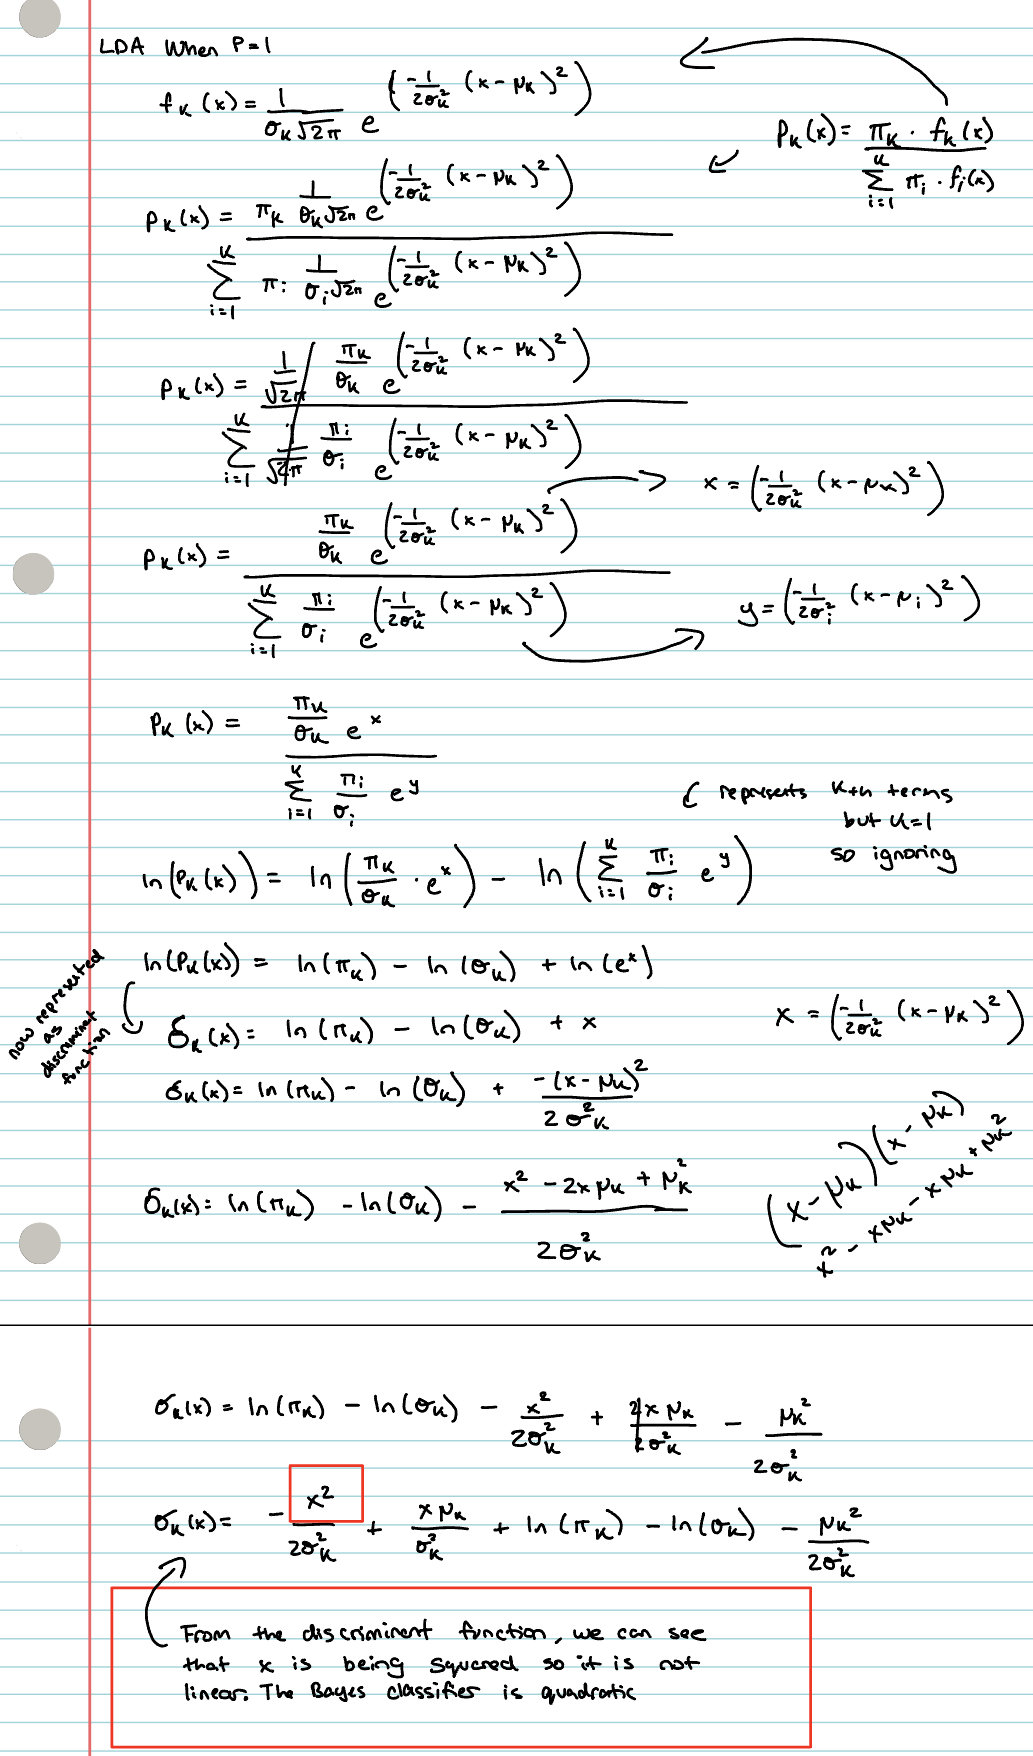

# ISLR 4.8.7

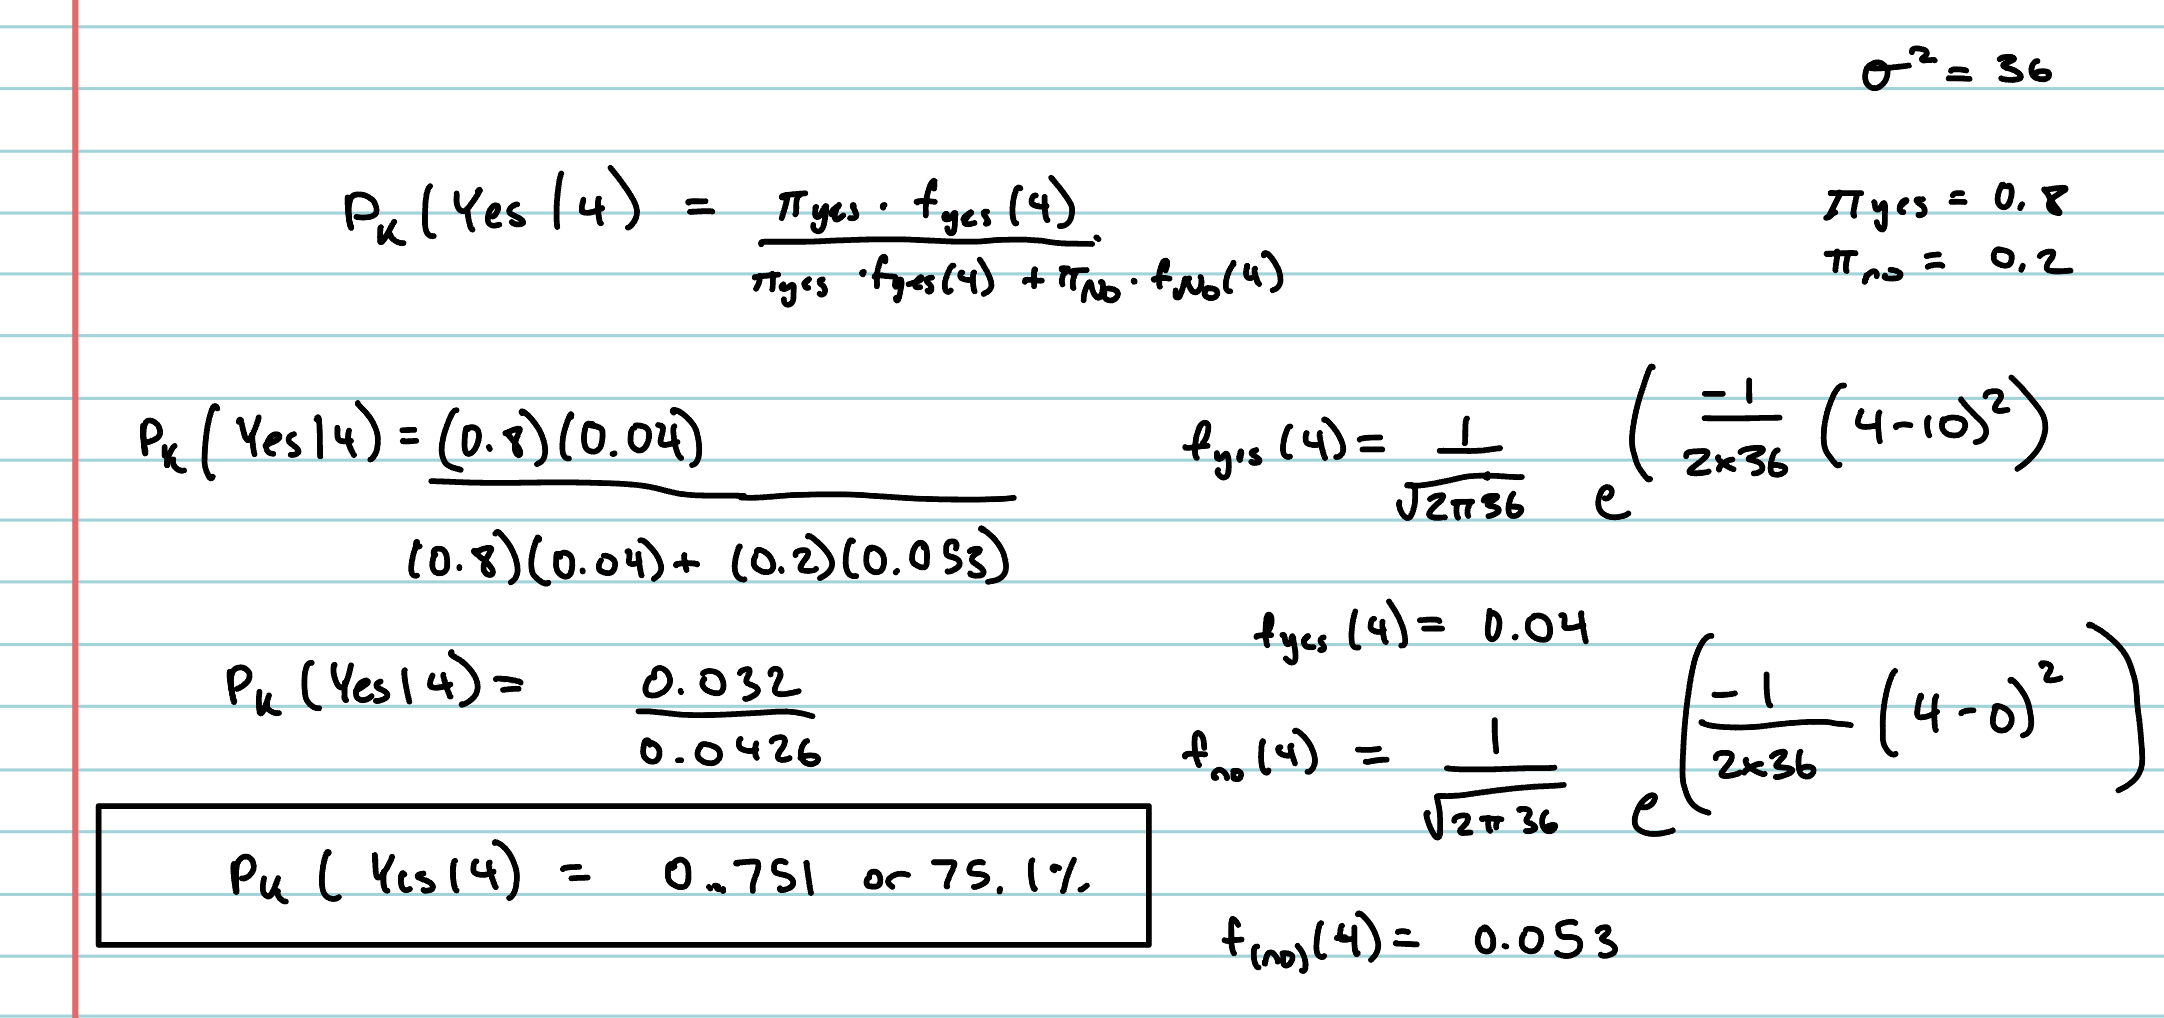

# References for Homework 4

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

https://machinelearningmastery.com/rfe-feature-selection-in-python/

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://numpy.org/doc/stable/reference/generated/numpy.array_split.html